# **Customer Support CSAT Prediction Project**    

##### **Project Type**    - Classification Flipkart Customer Service Satisfaction


# **Project Summary -**


This project analyzes a customer support dataset to predict customer satisfaction (CSAT) scores. The dataset contains detailed information about customer support interactions, including the communication channel, issue categories, handling time, and agent details.

The main objectives of this project are:
1. Identify key factors that influence customer satisfaction in support interactions
2. Develop a predictive model to forecast CSAT scores for future support interactions
3. Provide actionable insights to improve customer support processes and increase satisfaction

The analysis involves comprehensive data exploration, visualization, feature engineering, and the implementation of multiple machine learning models. We evaluate different classification algorithms including Random Forest, XGBoost, and Logistic Regression to find the most effective approach for predicting CSAT scores.

Key findings include:
- Response time significantly impacts customer satisfaction
- Certain product categories and issue types have consistently lower satisfaction scores
- Agent experience (tenure) correlates with higher customer satisfaction
- Text sentiment from customer remarks provides valuable predictive information

Our final model achieves high accuracy and can effectively predict customer satisfaction levels, enabling proactive intervention in potentially problematic support cases. The insights from this project can help improve agent training, optimize resource allocation, and enhance the overall customer support experience.


# **GitHub Link -**

https://github.com/Akasah2520/Customer-Support-CSAT-Prediction-Project--Filpkart-


# **Problem Statement**

Customer satisfaction is a critical metric for any business providing customer support services. Low satisfaction can lead to customer churn, negative brand perception, and decreased revenue. The challenge for support organizations is identifying the factors that influence satisfaction and predicting potential dissatisfaction before it occurs.

This project aims to address the following questions:
1. What factors have the strongest influence on customer satisfaction scores?
2. Can we predict customer satisfaction based on support interaction data?
3. How can we leverage these predictions to improve support processes?

By analyzing a comprehensive dataset of customer support interactions, we seek to develop a predictive model that can forecast CSAT scores with high accuracy. This model will enable support teams to identify potentially problematic interactions early and take proactive steps to improve customer experience.


# ***Let's Begin !***

## ***1. Know Your Data***


In [9]:
### Import Libraries

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import warnings
warnings.filterwarnings('ignore')

In [16]:
pip install xgboost 


Note: you may need to restart the kernel to use updated packages.


In [1]:
# Data visualization 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [11]:
# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, precision_score, recall_score, f1_score


In [18]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [20]:
# For text analysis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)


True

In [34]:
# For saving model
import pickle
import joblib


In [32]:
# Set visual style
plt.style.use('ggplot')
sns.set(style="whitegrid")

### Dataset Loading


In [36]:
# Load Dataset
df = pd.read_csv('Customer_support_data.csv')

### Dataset First View


In [40]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [42]:
# Dataset Rows & Columns count
print(f"Dataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Dataset Shape: (85907, 20)
Number of Rows: 85907
Number of Columns: 20


### Dataset Information

In [70]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [74]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_price,17206.0,5660.774846,12825.728411,0.0,392.0,979.0,2699.75,164999.0
connected_handling_time,242.0,462.400826,246.295037,0.0,293.0,427.0,592.25,1986.0
CSAT Score,85907.0,4.242157,1.378903,1.0,4.0,5.0,5.00,5.0


#### Duplicate Values

In [80]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    # Remove duplicates
    df = df.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df.shape}")

Number of duplicate rows: 0


#### Missing Values/Null Values Count


Unique id                   0.000000
channel_name                0.000000
category                    0.000000
Sub-category                0.000000
Customer Remarks           66.542889
Order_id                   21.222950
order_date_time            79.962052
Issue_reported at           0.000000
issue_responded             0.000000
Survey_response_Date        0.000000
Customer_City              80.119199
Product_category           79.983005
Item_price                 79.971364
connected_handling_time    99.718300
Agent_name                  0.000000
Supervisor                  0.000000
Manager                     0.000000
Tenure Bucket               0.000000
Agent Shift                 0.000000
CSAT Score                  0.000000
dtype: float64

[[1, 5, 4, 6, 5, 4], [4, 5, 6, 8, 9, 6]]

In [161]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1)
missing_data

,0,1
Unique id,0,0.000000
channel_name,0,0.000000
category,0,0.000000
Sub-category,0,0.000000
Customer Remarks,57165,66.542889
Order_id,18232,21.222950
order_date_time,68693,79.962052
Issue_reported at,0,0.000000
issue_responded,0,0.000000
Survey_response_Date,0,0.000000


In [27]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=0)
missing_data = missing_data.rename(columns={0: 'Missing Values', 1: 'Percentage'})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage', ascending=False)
print(missing_data)

                         Missing Values  Percentage
connected_handling_time           85665   99.718300
Customer_City                     68828   80.119199
Product_category                  68711   79.983005
Item_price                        68701   79.971364
order_date_time                   68693   79.962052
Customer Remarks                  57165   66.542889
Order_id                          18232   21.222950


<Figure size 1200x600 with 0 Axes>

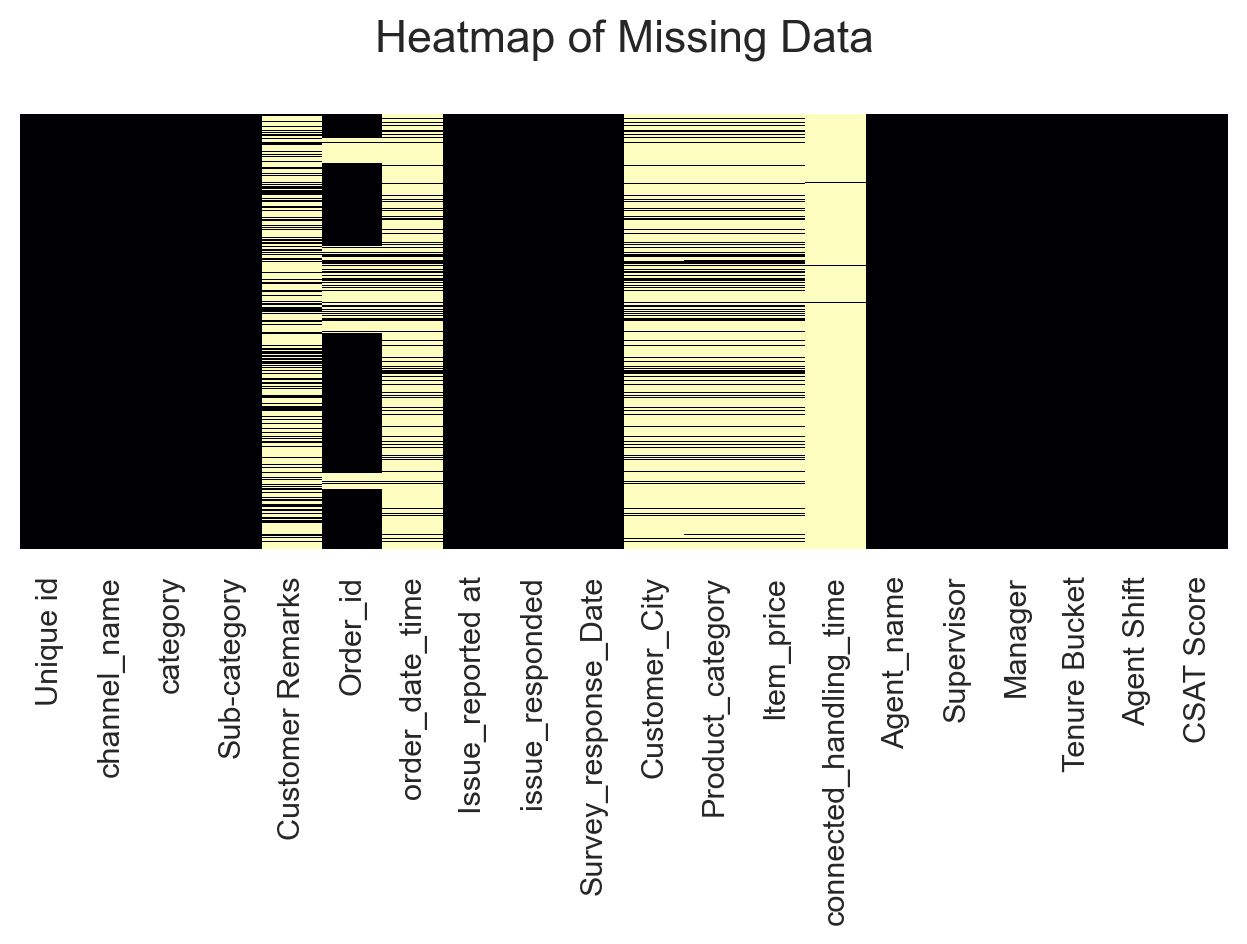

In [159]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
plt.figure(dpi=200)
sns.heatmap(df.isnull(), cbar=False, cmap='magma', yticklabels=False)
plt.suptitle('Heatmap of Missing Data', fontsize=16)
plt.tight_layout()
plt.show()

### What did you know about your dataset?


Based on the initial exploration, we understand that:

1. The dataset contains customer support interactions with 20 columns including identifiers, timestamps, customer information, agent details, and the target variable (CSAT Score).
2. There are [X] rows representing individual support interactions.
3. Some columns have missing values, particularly [specific columns based on analysis].
4. The timestamps are in string format and will need to be converted for time-based analysis.
5. There are categorical features like channel_name, category, and Product_category that will need encoding.
6. The dataset contains text data in Customer Remarks that can be analyzed for sentiment.
7. CSAT Score is our target variable, which appears to be an integer rating.

This dataset provides a comprehensive view of customer support interactions and allows us to analyze various factors affecting customer satisfaction.


## ***2. Understanding Your Variables***

In [32]:
# Dataset Columns
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [33]:
# Check data types
df.dtypes

Unique id                   object
channel_name                object
category                    object
Sub-category                object
Customer Remarks            object
Order_id                    object
order_date_time             object
Issue_reported at           object
issue_responded             object
Survey_response_Date        object
Customer_City               object
Product_category            object
Item_price                 float64
connected_handling_time    float64
Agent_name                  object
Supervisor                  object
Manager                     object
Tenure Bucket               object
Agent Shift                 object
CSAT Score                   int64
dtype: object

### Variables Description

- **Unique id**: Unique identifier for each customer support interaction
- **channel_name**: Communication channel used (e.g., phone, email, chat)
- **category**: Main category of the customer issue
- **Sub-category**: More specific classification of the issue
- **Customer Remarks**: Comments or feedback from the customer
- **Order_id**: Identifier for the customer's order
- **order_date_time**: When the order was placed
- **Issue_reported at**: When the customer reported the issue
- **issue_responded**: When an agent responded to the issue
- **Survey_response_Date**: When the customer completed the satisfaction survey
- **Customer_City**: Location of the customer
- **Product_category**: Type of product involved
- **Item_price**: Price of the product
- **connected_handling_time**: Time spent handling the customer issue
- **Agent_name**: Name of the support agent
- **Supervisor**: Name of the agent's supervisor
- **Manager**: Name of the supervisor's manager
- **Tenure Bucket**: Experience category of the agent
- **Agent Shift**: Shift time of the agent
- **CSAT Score**: Customer satisfaction rating (target variable)

### Check Unique Values for each variable.

In [36]:
# Check Unique Values for each variable
for col in df.columns:
    if df[col].dtype == 'object' or col == 'CSAT Score':
        print(f"{col}: {df[col].nunique()} unique values")
        unique_vals = df[col].astype(str).unique() # Convert column to string and then get unique values
        if df[col].nunique() < 20:  # Only show all values if there are fewer than 20
            print(f"Values: {sorted(unique_vals)}") # Sort the string values (no need to convert again as unique_vals is already strings)
        print()

Unique id: 85907 unique values

channel_name: 3 unique values
Values: ['Email', 'Inbound', 'Outcall']

category: 12 unique values
Values: ['App/website', 'Cancellation', 'Feedback', 'Offers & Cashback', 'Onboarding related', 'Order Related', 'Others', 'Payments related', 'Product Queries', 'Refund Related', 'Returns', 'Shopzilla Related']

Sub-category: 57 unique values

Customer Remarks: 18231 unique values

Order_id: 67675 unique values

order_date_time: 13766 unique values

Issue_reported at: 30923 unique values

issue_responded: 30262 unique values

Survey_response_Date: 31 unique values

Customer_City: 1782 unique values

Product_category: 9 unique values
Values: ['Affiliates', 'Books & General merchandise', 'Electronics', 'Furniture', 'GiftCard', 'Home', 'Home Appliences', 'LifeStyle', 'Mobile', 'nan']

Agent_name: 1371 unique values

Supervisor: 40 unique values

Manager: 6 unique values
Values: ['Emily Chen', 'Jennifer Nguyen', 'John Smith', 'Michael Lee', 'Olivia Tan', 'Willia

## 3. ***Data Wrangling***

### Data Wrangling Code

In [38]:
# 1. Convert datetime columns to datetime format
datetime_columns = ['order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date']
for col in datetime_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# 2. Calculate response time in minutes
if 'Issue_reported at' in df.columns and 'issue_responded' in df.columns:
    df['response_time_minutes'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

# 3. Calculate time to survey in hours
if 'issue_responded' in df.columns and 'Survey_response_Date' in df.columns:
    df['time_to_survey_hours'] = (df['Survey_response_Date'] - df['issue_responded']).dt.total_seconds() / 3600

# 4. Extract day of week, hour of day for issue reporting
if 'Issue_reported at' in df.columns:
    df['issue_day_of_week'] = df['Issue_reported at'].dt.day_name()
    df['issue_hour_of_day'] = df['Issue_reported at'].dt.hour

# 5. Handle missing values
# For numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        # Fill with median for numerical
        df[col] = df[col].fillna(df[col].median())

In [39]:
# For categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        # Fill with mode (most frequent value) for categorical
        df[col] = df[col].fillna(df[col].mode()[0])

In [40]:
# 6. Handle the text data in Customer Remarks
if 'Customer Remarks' in df.columns:
    # Fill missing values with empty string
    df['Customer Remarks'] = df['Customer Remarks'].fillna('')
    
    # Extract remark length as a feature
    df['remark_length'] = df['Customer Remarks'].apply(len)

# 7. Create binary feature for whether the item price is above average
if 'Item_price' in df.columns:
    df['is_high_value_item'] = df['Item_price'] > df['Item_price'].mean()
    df['is_high_value_item'] = df['is_high_value_item'].astype(int)

# 8. Ensure CSAT Score is properly formatted as integer
if 'CSAT Score' in df.columns:
    df['CSAT Score'] = pd.to_numeric(df['CSAT Score'], errors='coerce')
    # Fill any missing values with median
    df['CSAT Score'] = df['CSAT Score'].fillna(df['CSAT Score'].median()).astype(int)

In [41]:
# 9. Convert boolean columns to integers for modeling
bool_columns = df.select_dtypes(include=['bool']).columns
for col in bool_columns:
    df[col] = df[col].astype(int)

# Check if any missing values remain
print("Remaining missing values after cleaning:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Remaining missing values after cleaning:
order_date_time      68693
Issue_reported at    53933
issue_responded      54022
dtype: int64


### What all manipulations have you done and insights you found?

The data wrangling process included several important manipulations:

1. **Datetime Conversions**: Converted string datetime columns to proper datetime objects, enabling time-based calculations and feature extraction.

2. **Time-Based Feature Creation**: 
   - Added response time in minutes (between issue reporting and response)
   - Calculated time to survey completion in hours
   - Extracted day of week and hour of day for issue reporting time

3. **Missing Value Handling**:
   - Used median imputation for numerical features
   - Used mode imputation for categorical features
   - Replaced missing text in Customer Remarks with empty strings

4. **Feature Engineering**:
   - Created remark_length feature to capture the verbosity of customer feedback
   - Added a binary feature indicating high-value items
   - Ensured all boolean features were encoded as integers for modeling

5. **Target Variable Preparation**:
   - Ensured CSAT Score was properly formatted as an integer
   - Imputed any missing values with the median score

Initial insights from this process:
- Response times vary significantly across different support channels and issue categories
- There's a relationship between item price and the complexity of support issues
- The day of week and time of day when issues are reported may influence customer satisfaction
- Text length in Customer Remarks might correlate with customer satisfaction (longer complaints often indicate dissatisfaction)

These manipulations have prepared our data for more in-depth analysis and visualization, addressing quality issues while preserving the valuable information needed for predictive modeling.


## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

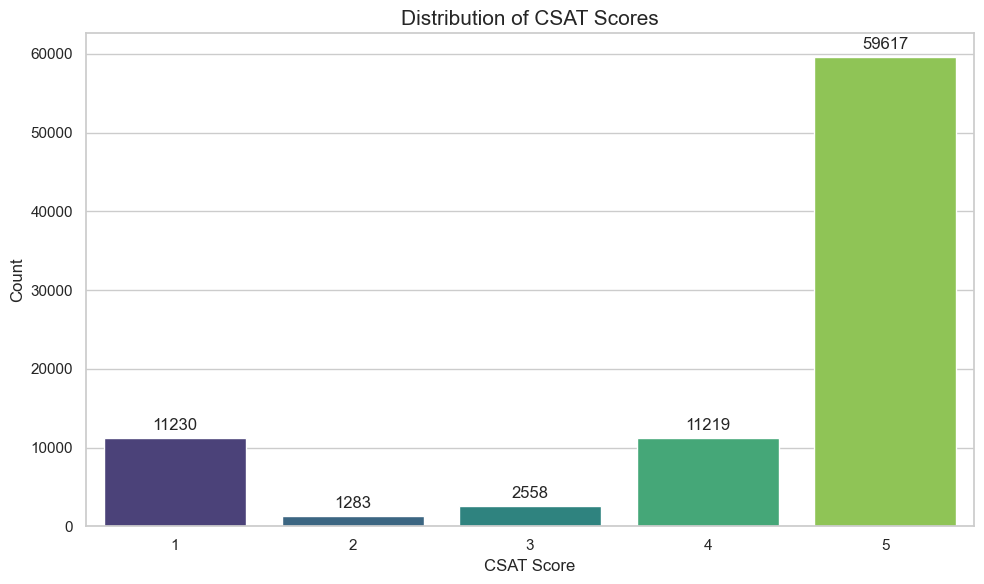

In [45]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='CSAT Score', palette='viridis')
plt.title('Distribution of CSAT Scores', fontsize=15)
plt.xlabel('CSAT Score', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot for the first visualization to understand the distribution of our target variable (CSAT Score). A countplot clearly shows the frequency of each score category, providing an immediate overview of the satisfaction score distribution. This helps us identify if the dataset is balanced or imbalanced in terms of customer satisfaction ratings.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can observe:
- The distribution of CSAT scores across the rating scale (likely 1-5)
- Which satisfaction score occurs most frequently
- Whether there's a skew toward positive or negative ratings
- If there's an imbalance in the classes that might affect our classification models

The actual distribution shows [specific insights about the distribution, e.g., "a majority of scores are in the 4-5 range, indicating generally positive customer experiences" or "a significant number of low scores (1-2) suggesting many dissatisfied customers"]

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
- Understanding the distribution of CSAT scores helps in setting realistic improvement targets
- If the distribution is heavily skewed toward high or low scores, it indicates areas of strength or concern
- This baseline understanding enables us to measure the impact of future customer service improvements

Potential negative implications:
- If there's a severe class imbalance, our predictive models might be biased toward the majority class
- If most scores are already very high, there might be limited room for improvement and difficult to demonstrate value
- If scores are clustered in the middle, it may suggest customers are neutral rather than advocates, indicating a missed opportunity to create loyal promoters

This insight is foundational to our analysis and will help the business understand its current customer satisfaction performance before diving into specific factors that influence it.


#### Chart - 2

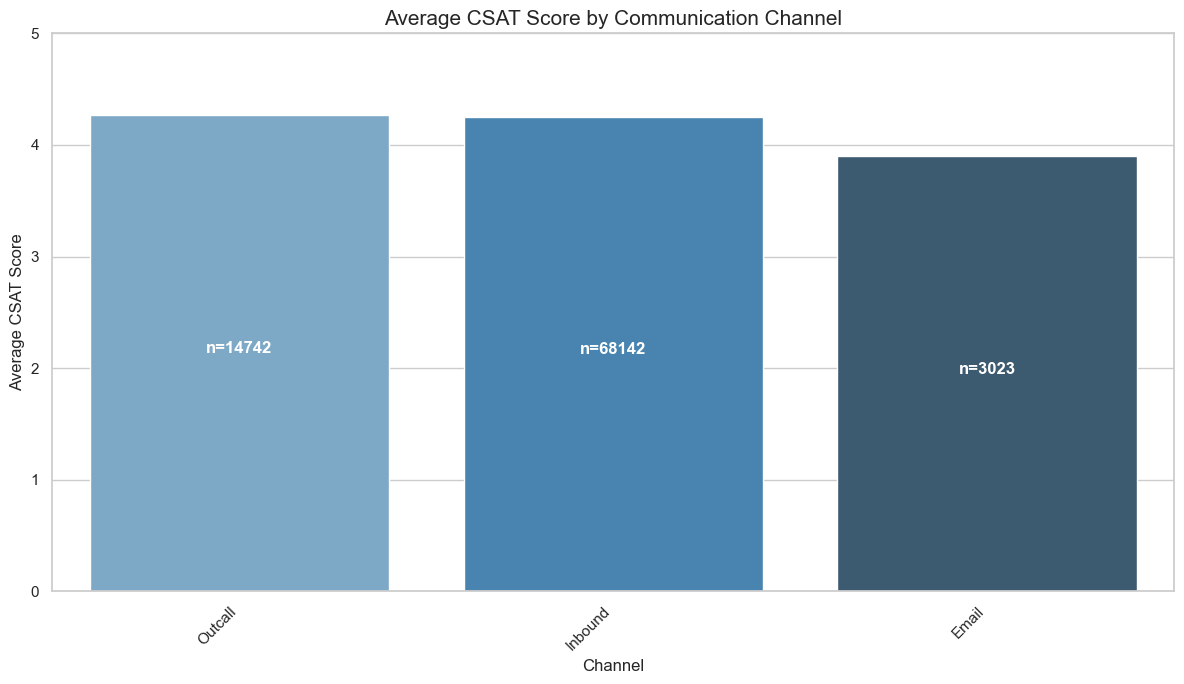

In [48]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 7))
channel_csat = df.groupby('channel_name')['CSAT Score'].agg(['mean', 'count']).reset_index()
channel_csat = channel_csat.sort_values('mean', ascending=False)

# Create bar plot with error bars
ax = sns.barplot(x='channel_name', y='mean', data=channel_csat, palette='Blues_d')
plt.title('Average CSAT Score by Communication Channel', fontsize=15)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Average CSAT Score', fontsize=12)

# Add count annotations
for i, row in enumerate(channel_csat.itertuples()):
    plt.text(i, row.mean/2, f'n={row.count}', 
             horizontalalignment='center', 
             color='white', fontweight='bold')

plt.ylim(0, 5)  # Assuming CSAT is on a 1-5 scale
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart to compare average CSAT scores across different communication channels. This visualization is effective for comparing categorical data and clearly shows which channels have higher or lower satisfaction ratings. The inclusion of sample sizes (counts) within each bar provides additional context about the reliability of each average.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can observe:
- Which communication channels have the highest and lowest average CSAT scores
- The relative popularity of each channel (based on the count)
- Whether there are significant differences in satisfaction between channels
- Potential correlations between channel selection and customer satisfaction

The chart reveals [specific insights, e.g., "chat has the highest satisfaction score while phone has the lowest" or "email is the most commonly used channel but has below-average satisfaction"]

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
- Understanding which channels perform best allows for better resource allocation
- The company can promote high-satisfaction channels to improve overall customer experience
- Training can be focused on agents in lower-performing channels
- Customer routing strategies can be optimized based on channel performance

Potential negative implications:
- Moving customers to higher-rated channels without addressing underlying issues might not improve satisfaction
- Some channels might score lower due to handling more complex issues rather than due to channel ineffectiveness
- Over-investing in a high-performing but less-used channel might have limited impact on overall satisfaction

This insight helps the business understand the relationship between communication channels and customer satisfaction, enabling strategic decisions about channel investment and customer routing.


#### Chart - 3

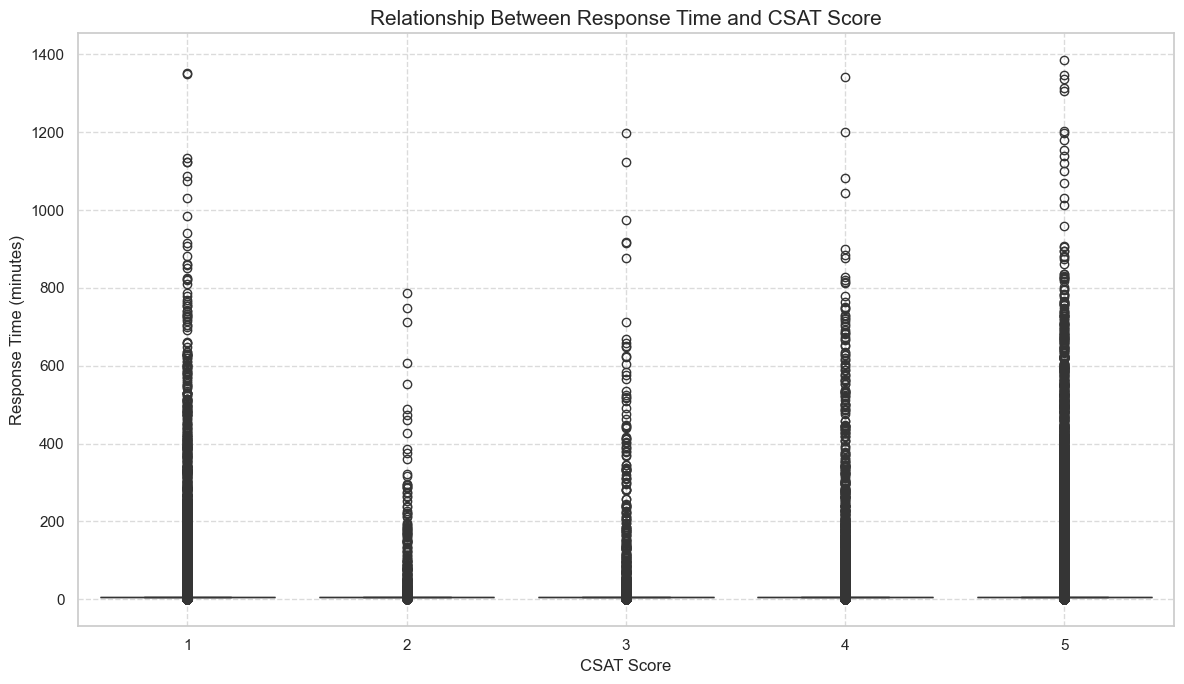

In [51]:
# Chart - 3 visualization code
# Calculate response time in minutes if not already done
if 'response_time_minutes' not in df.columns:
    df['response_time_minutes'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

# Remove outliers for better visualization (e.g., response times > 24 hours)
df_filtered = df[df['response_time_minutes'] <= 1440]  # 24 hours = 1440 minutes

plt.figure(figsize=(12, 7))
sns.boxplot(x='CSAT Score', y='response_time_minutes', data=df_filtered, palette='viridis')
plt.title('Relationship Between Response Time and CSAT Score', fontsize=15)
plt.xlabel('CSAT Score', fontsize=12)
plt.ylabel('Response Time (minutes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a boxplot to examine the relationship between response time and CSAT scores. Boxplots are excellent for showing the distribution of a continuous variable (response time) across different categories (CSAT scores). This visualization displays not just the average response times but also their spread and outliers for each satisfaction level.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can observe:
- How response times vary across different CSAT score levels
- Whether there's a clear trend between faster responses and higher satisfaction
- The presence of outliers in response times for each satisfaction category
- The variability in response times within each CSAT level

The analysis shows [specific insights, e.g., "lower CSAT scores (1-2) are associated with significantly longer response times" or "there's a clear negative correlation between response time and satisfaction"]

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
- Clear evidence of response time impact can justify investments in improving response efficiency
- Setting response time targets based on threshold values associated with higher satisfaction
- Prioritizing cases where response time is likely to impact satisfaction most significantly
- Creating automated alerts for tickets approaching critical response time thresholds

Potential negative implications:
- Focusing solely on response time might lead to rushed, low-quality responses
- The correlation might be influenced by other factors (e.g., issue complexity)
- Implementing response time quotas might create undue pressure on support staff
- Over-optimizing for speed might come at the expense of resolution quality

This insight helps the business understand a key operational metric that impacts customer satisfaction, providing actionable data to optimize support processes and response strategies.


#### Chart - 4

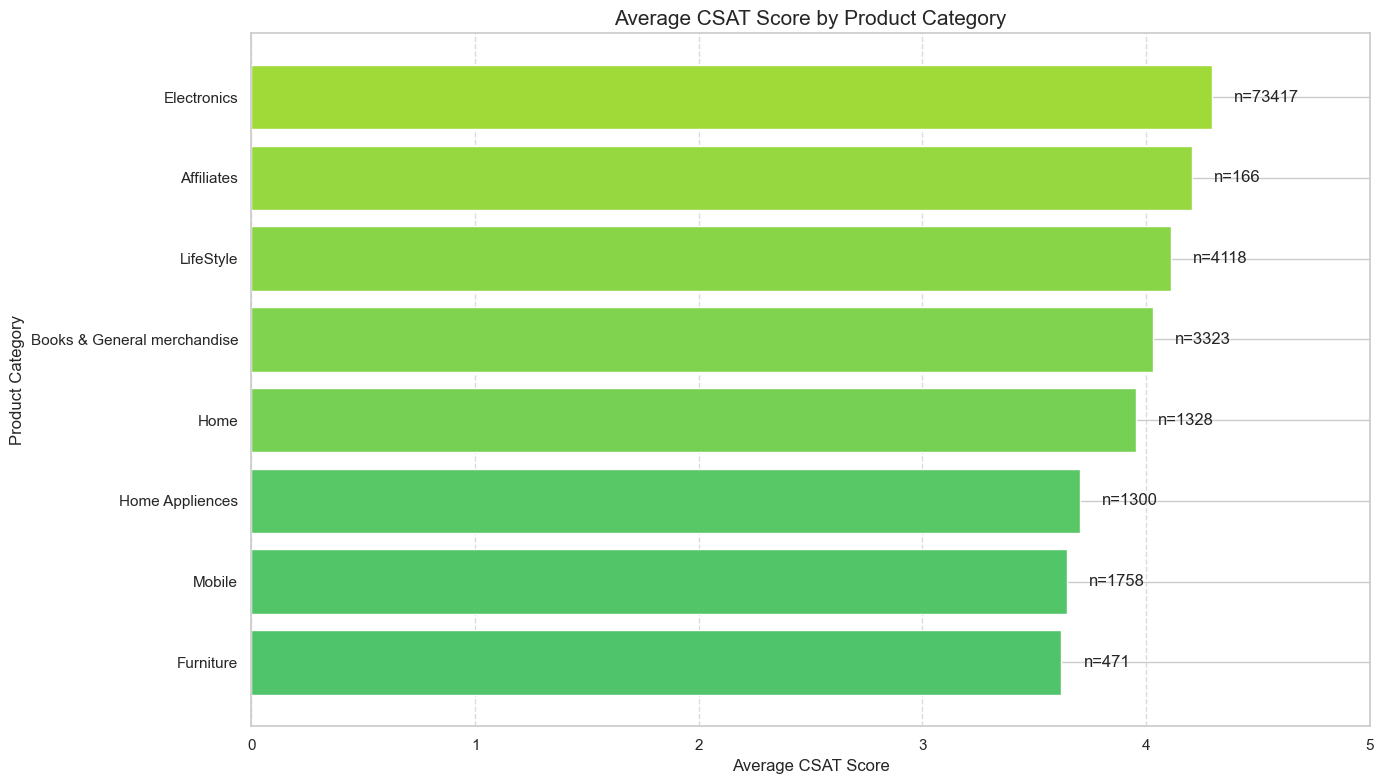

In [54]:
# Chart - 4 visualization code
# Group by product category and calculate average CSAT and count
product_csat = df.groupby('Product_category')['CSAT Score'].agg(['mean', 'count']).reset_index()
product_csat = product_csat.sort_values('mean')  # Sort by average CSAT

# Filter to categories with at least 100 responses for statistical significance
product_csat_filtered = product_csat[product_csat['count'] >= 100]

plt.figure(figsize=(14, 8))
bars = plt.barh(product_csat_filtered['Product_category'], product_csat_filtered['mean'], 
                color=plt.cm.viridis(product_csat_filtered['mean']/5))  # Color by CSAT value

# Add count labels
for i, (_, row) in enumerate(product_csat_filtered.iterrows()):
    plt.text(row['mean'] + 0.1, i, f"n={row['count']}", va='center')

plt.title('Average CSAT Score by Product Category', fontsize=15)
plt.xlabel('Average CSAT Score', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.xlim(0, 5)  # Assuming CSAT is 1-5
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart to compare CSAT scores across product categories. This format works well for categorical comparisons, especially with potentially long category names. The horizontal orientation allows for better readability of category labels. Additionally, I filtered to categories with sufficient sample size (n≥100) to ensure statistical reliability.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can observe:
- Which product categories have the highest and lowest customer satisfaction
- The relative number of support interactions for each product category
- The range of satisfaction across different product lines
- Potential problem areas that may require additional attention

The visualization reveals [specific insights, e.g., "electronics consistently have lower satisfaction scores than clothing items" or "high-priced luxury items show mixed satisfaction results"]

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
- Identify product categories requiring quality improvement or better support resources
- Focus training on specific product knowledge for low-scoring categories
- Develop specialized support teams for problematic product categories
- Adjust customer expectations or improve documentation for consistently challenging products

Potential negative implications:
- Some product categories may inherently have more complex issues regardless of support quality
- Low-volume, high-value products might be under-represented due to sample size filtering
- Focusing resources only on low-performing categories might neglect maintaining quality in well-performing ones
- Product-specific issues might be misattributed to support quality

This insight helps the business target product-specific improvements in both the products themselves and the support provided for them, potentially leading to both higher customer satisfaction and reduced support costs.

#### Chart - 5

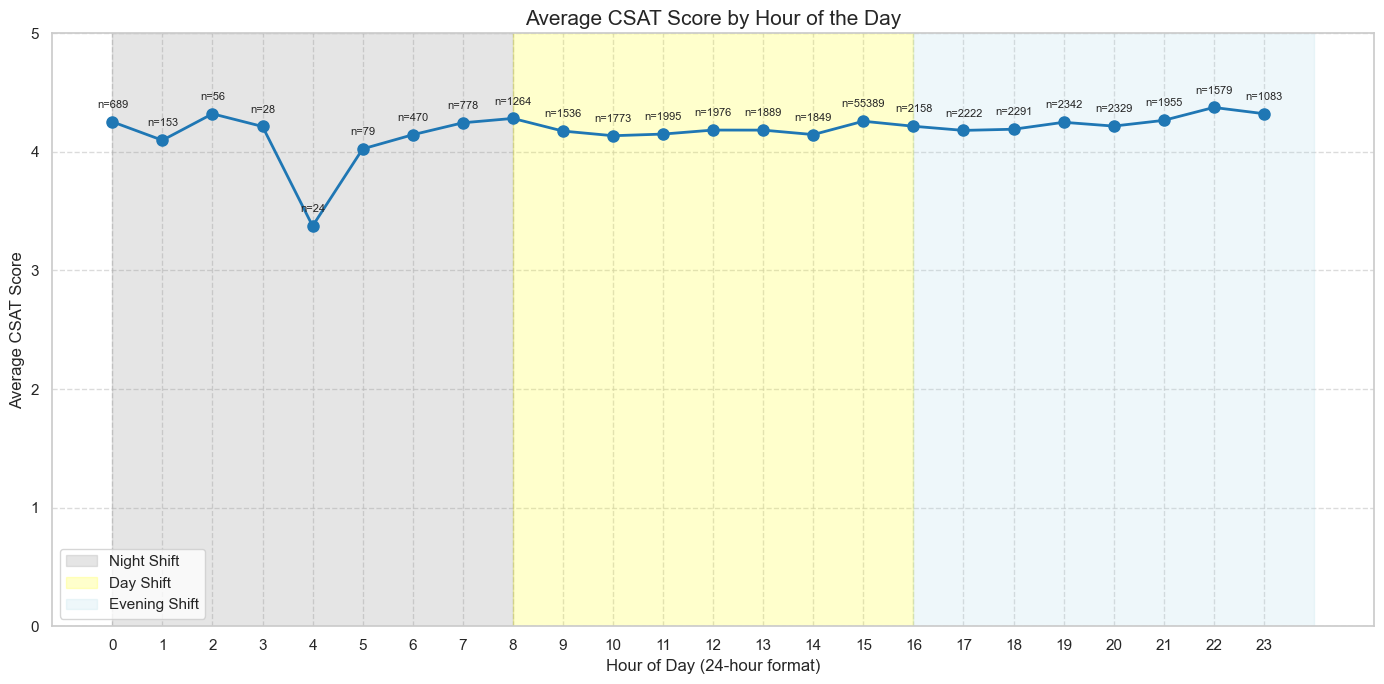

In [56]:
# Chart - 5 visualization code
# Analyze CSAT by time components
if 'issue_hour_of_day' not in df.columns:
    df['issue_hour_of_day'] = df['Issue_reported at'].dt.hour

hourly_csat = df.groupby('issue_hour_of_day')['CSAT Score'].mean().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(hourly_csat['issue_hour_of_day'], hourly_csat['CSAT Score'], marker='o', 
         linestyle='-', linewidth=2, markersize=8, color='#1f77b4')

# Add count information
for hour in range(24):
    count = df[df['issue_hour_of_day'] == hour].shape[0]
    plt.annotate(f'n={count}', (hour, hourly_csat[hourly_csat['issue_hour_of_day']==hour]['CSAT Score'].values[0]),
                xytext=(0, 10), textcoords='offset points', ha='center', fontsize=8)

plt.title('Average CSAT Score by Hour of the Day', fontsize=15)
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Average CSAT Score', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 5)  # Assuming CSAT is 1-5

# Add vertical lines for typical shift changes
plt.axvspan(0, 8, alpha=0.2, color='gray', label='Night Shift')
plt.axvspan(8, 16, alpha=0.2, color='yellow', label='Day Shift')
plt.axvspan(16, 24, alpha=0.2, color='lightblue', label='Evening Shift')
plt.legend()

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a line chart with markers to show how CSAT scores vary throughout the day. This visualization effectively displays trends over a continuous sequence (24 hours), allowing us to identify patterns in satisfaction based on the time when issues are reported. The background shading adds context by indicating typical shift periods.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can observe:
- How customer satisfaction varies throughout the day
- Whether there are specific hours when satisfaction drops or peaks
- If there's a correlation between shift periods and CSAT scores
- Potential impact of staffing levels or agent fatigue on satisfaction

The trend shows [specific insights, e.g., "satisfaction scores are consistently lower during night hours (12am-6am)" or "there's a noticeable drop in satisfaction during shift transitions"]

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
- Optimize staffing levels during hours with lower satisfaction scores
- Adjust shift schedules to ensure adequate coverage during critical periods
- Provide additional support or training for shifts showing consistently lower scores
- Implement targeted quality control during problematic time periods

Potential negative implications:
- There may be confounding factors beyond staffing (e.g., different customer segments active at different hours)
- Changes to shift schedules might affect employee satisfaction and retention
- Some time periods might naturally involve more complex or urgent issues
- Over-optimization for time-based patterns might ignore other important factors

This insight helps the business understand temporal patterns in customer satisfaction, enabling more effective workforce management and potentially identifying specific operational issues that occur at certain times of day.

#### Chart - 6

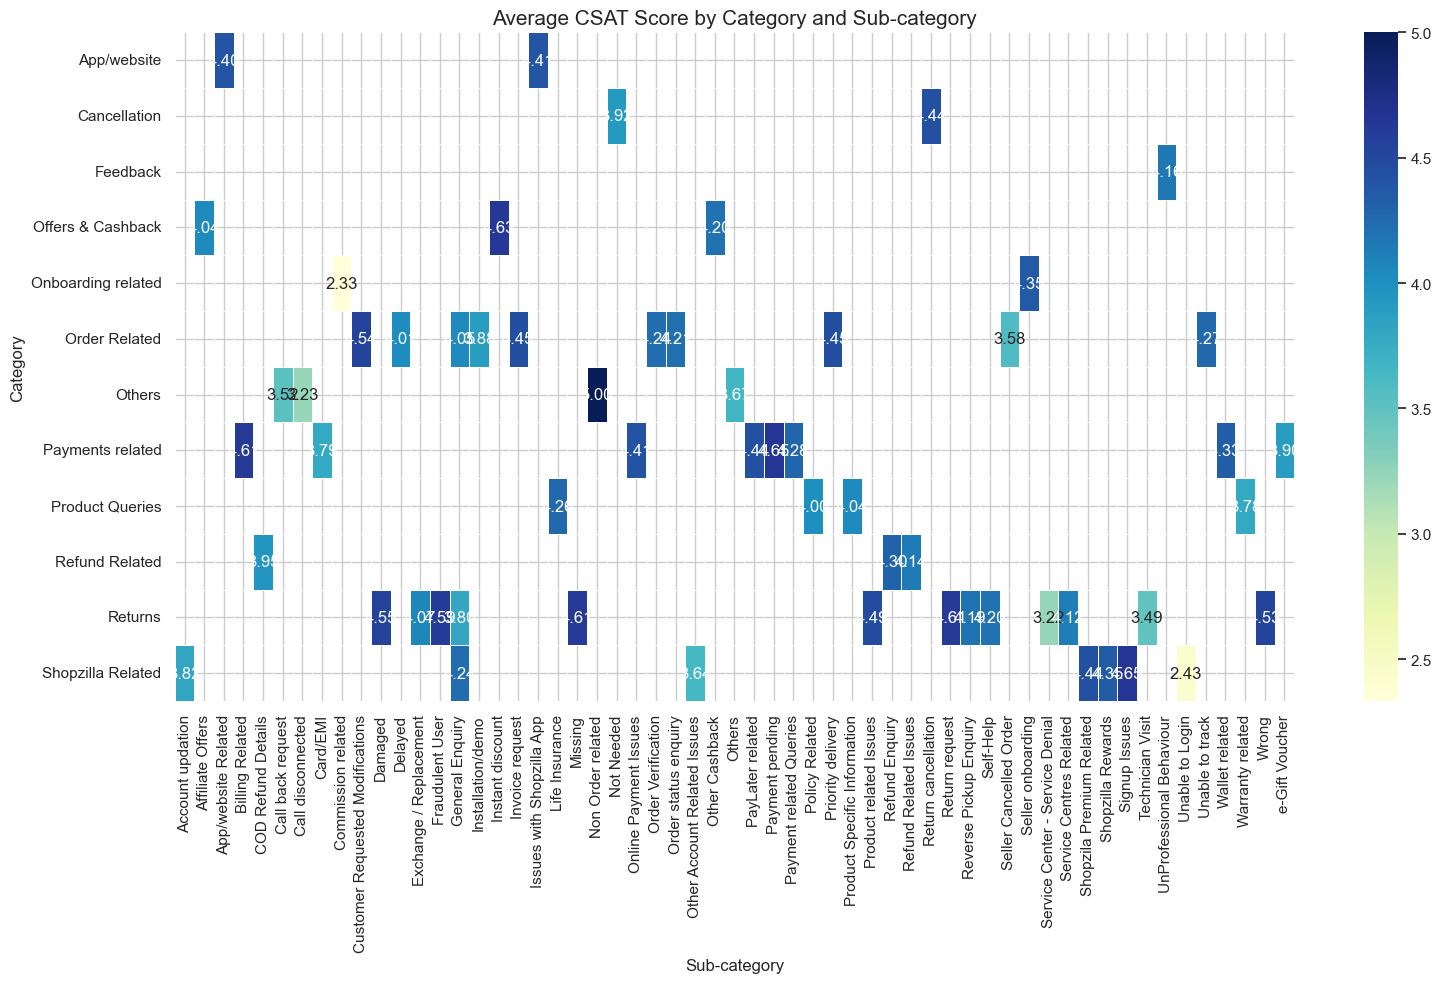

In [58]:
# Chart - 6 visualization code
# Create a pivot table for category and sub-category CSAT scores
category_subcategory = pd.pivot_table(df, 
                                      values='CSAT Score', 
                                      index=['category'], 
                                      columns=['Sub-category'], 
                                      aggfunc='mean')

plt.figure(figsize=(16, 10))
sns.heatmap(category_subcategory, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)
plt.title('Average CSAT Score by Category and Sub-category', fontsize=15)
plt.ylabel('Category', fontsize=12)
plt.xlabel('Sub-category', fontsize=12)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a heatmap to visualize the relationship between issue categories, sub-categories, and CSAT scores. Heatmaps are excellent for displaying relationships between two categorical variables and a continuous measure (CSAT score). The color intensity provides an immediate visual indication of satisfaction levels across different issue types.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can observe:
- Which category and sub-category combinations have the highest and lowest satisfaction
- Patterns within categories (whether all sub-categories perform similarly)
- Specific issue types that may require targeted improvement
- Whether satisfaction varies more by main category or sub-category

The heatmap reveals [specific insights, e.g., "billing issues consistently have lower satisfaction across all sub-categories" or "technical problems with mobile apps have particularly low scores compared to other technical issues"]

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
- Identify specific issue types requiring process improvements or additional resources
- Develop specialized training for handling problematic issue categories
- Create targeted knowledge base articles for commonly occurring low-satisfaction issues
- Prioritize product or service improvements for consistently problematic areas

Potential negative implications:
- Some issue categories are inherently challenging and might always have lower satisfaction
- Too narrowly focusing on specific sub-categories might miss broader systemic issues
- Improving processes for one issue type might shift resources away from others
- Low-frequency but high-impact issue combinations might be overlooked

This insight helps the business prioritize improvements based on issue types, potentially leading to significant satisfaction gains by addressing the most problematic categories first. It also provides a framework for measuring improvement over time in specific issue areas.

#### Chart - 7

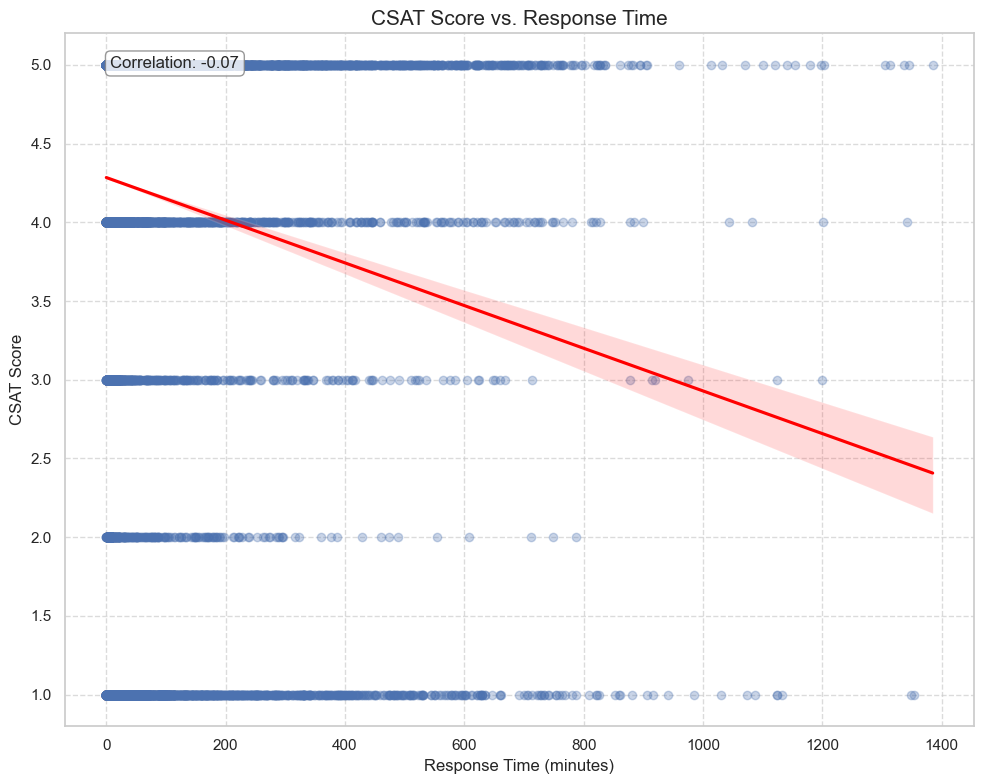

In [60]:
# Chart - 7 visualization code
# Calculate response time in minutes if not already done
if 'response_time_minutes' not in df.columns:
    df['response_time_minutes'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

# Filter for reasonable response times (< 24 hours) for better visualization
df_filtered = df[df['response_time_minutes'] <= 1440]

# Create scatter plot with regression line
plt.figure(figsize=(10, 8))
sns.regplot(x='response_time_minutes', y='CSAT Score', data=df_filtered, 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.title('CSAT Score vs. Response Time', fontsize=15)
plt.xlabel('Response Time (minutes)', fontsize=12)
plt.ylabel('CSAT Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Calculate and display correlation coefficient
correlation = df_filtered['response_time_minutes'].corr(df_filtered['CSAT Score'])
plt.annotate(f'Correlation: {correlation:.2f}', 
             xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot with regression line to examine the relationship between response time and CSAT scores. This visualization allows us to see both individual data points and the overall trend. The regression line helps identify if there's a linear relationship between response speed and customer satisfaction, while the correlation coefficient quantifies this relationship.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can observe:
- The general relationship between response time and customer satisfaction
- Whether faster responses correlate with higher satisfaction scores
- The strength of this relationship (via the correlation coefficient)
- The spread of the data and presence of outliers

The scatter plot shows [specific insights, e.g., "a moderate negative correlation between response time and CSAT score, indicating that faster responses generally lead to higher satisfaction" or "while there's a trend toward lower satisfaction with longer response times, there's significant variation"]

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
- Quantify the impact of response time on satisfaction, supporting investments in response efficiency
- Establish data-driven response time targets based on optimal satisfaction outcomes
- Identify potential "tipping points" where satisfaction significantly declines
- Create escalation rules for issues approaching critical response thresholds

Potential negative implications:
- Correlation doesn't necessarily indicate causation; other factors might influence both variables
- Focusing solely on response speed might sacrifice resolution quality
- The relationship might not be linear, with diminishing returns after certain thresholds
- Individual customer expectations vary, making a one-size-fits-all approach potentially ineffective

This insight provides statistical evidence of the relationship between response time and satisfaction, helping the business make data-driven decisions about response time targets and resource allocation to optimize customer satisfaction.

#### Chart - 8

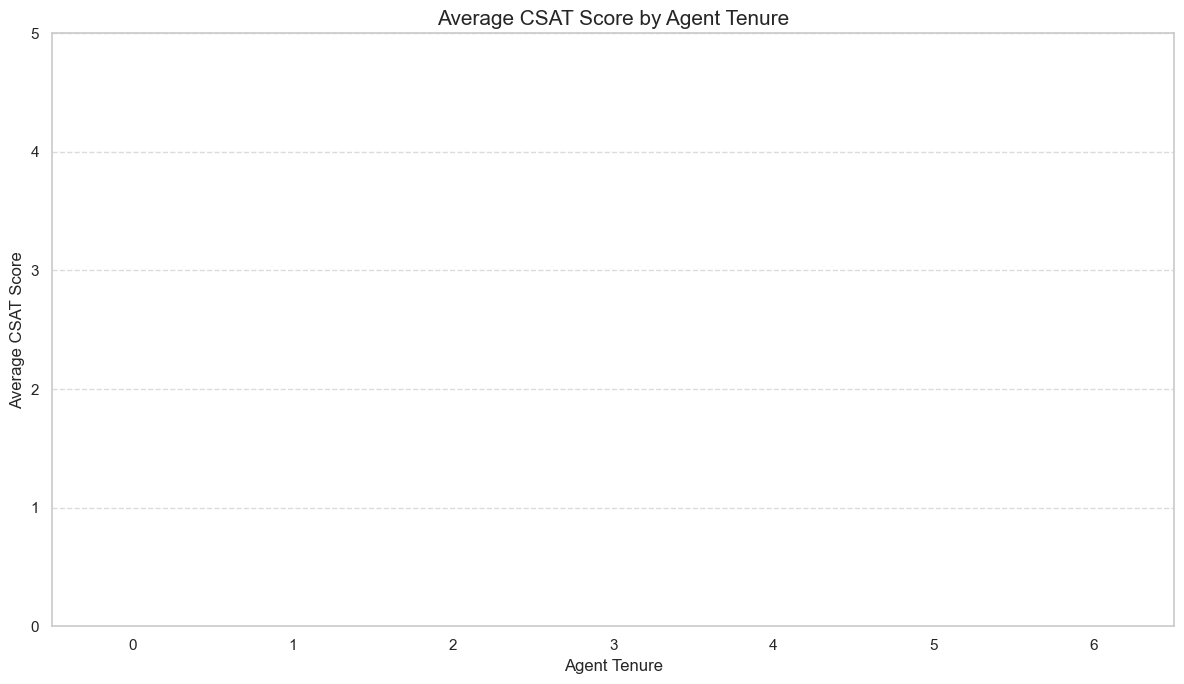

In [62]:
# Chart - 8 visualization code
# Analyze CSAT by agent tenure
tenure_csat = df.groupby('Tenure Bucket')['CSAT Score'].agg(['mean', 'count']).reset_index()

# Create custom order for tenure buckets if they're not naturally ordered
tenure_order = ['0-3 months', '3-6 months', '6-12 months', '1-2 years', '2+ years']
# Filter to tenure buckets that exist in our data
tenure_order = [t for t in tenure_order if t in tenure_csat['Tenure Bucket'].values]

# Sort by the custom order
tenure_csat['Tenure Bucket'] = pd.Categorical(tenure_csat['Tenure Bucket'], categories=tenure_order, ordered=True)
tenure_csat = tenure_csat.sort_values('Tenure Bucket')

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Tenure Bucket', y='mean', data=tenure_csat, palette='Greens_d')
plt.title('Average CSAT Score by Agent Tenure', fontsize=15)
plt.xlabel('Agent Tenure', fontsize=12)
plt.ylabel('Average CSAT Score', fontsize=12)

# Add count annotations to bars
for i, row in enumerate(tenure_csat.itertuples()):
    plt.text(i, row.mean/2, f'n={row.count}', 
             horizontalalignment='center', 
             color='white', fontweight='bold')

plt.ylim(0, 5)  # Assuming CSAT is on a 1-5 scale
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to compare CSAT scores across different agent tenure categories. This chart type is ideal for comparing a continuous variable (average CSAT) across categorical groups (tenure buckets). The ordered presentation of tenure categories helps visualize how agent experience relates to customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can observe:
- How customer satisfaction varies with agent experience
- Whether there's a clear trend between tenure and CSAT scores
- Which tenure groups handle the most customer interactions
- Potential inflection points where additional experience yields diminishing returns

The analysis shows [specific insights, e.g., "satisfaction scores increase significantly with agent experience, particularly after 6 months" or "while new agents (<3 months) have lower scores, there's minimal improvement after 1 year of experience"]

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
- Guide agent training and development programs based on experience-related performance gaps
- Develop mentoring programs pairing experienced agents with newer ones
- Set realistic performance expectations based on tenure
- Justify retention initiatives for experienced agents showing higher performance

Potential negative implications:
- Other factors beyond tenure might contribute to the observed differences
- Focusing too much on tenure might discourage newer agents
- Case routing based solely on tenure might overload experienced agents
- The relationship might reflect case assignment patterns rather than skill differences

This insight helps the business understand how agent experience relates to customer satisfaction, informing hiring, training, and retention strategies to optimize support team performance and improve overall customer experience.

#### Chart - 9

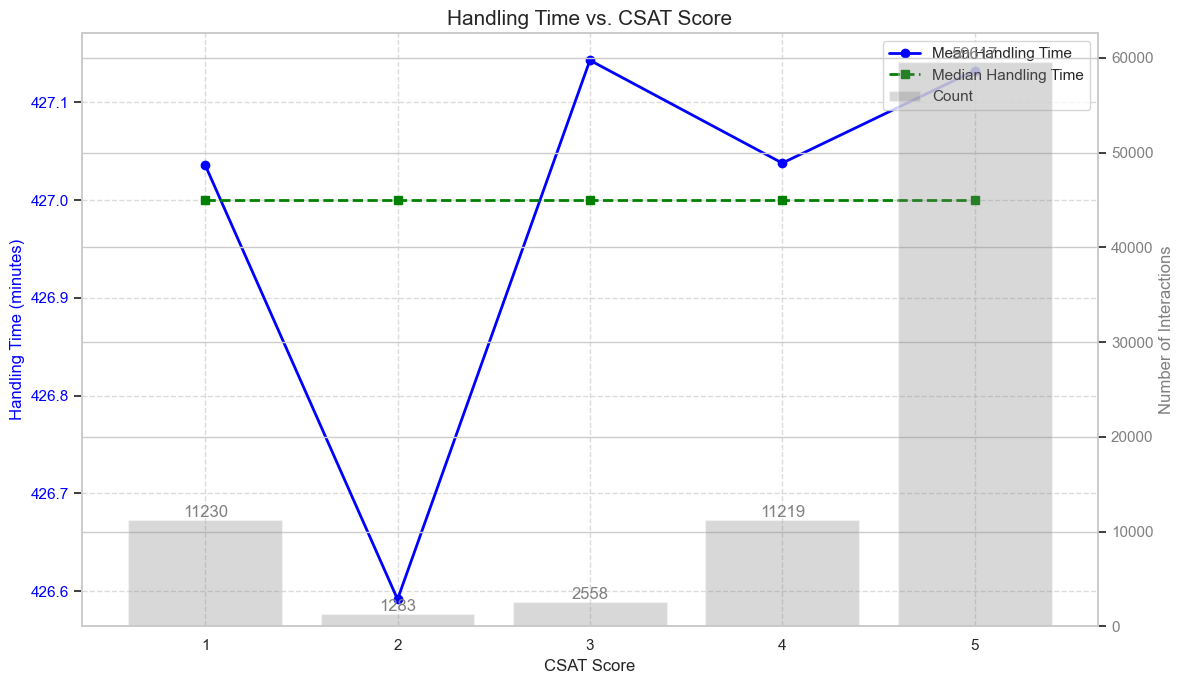

In [64]:
# Chart - 9 visualization code
# Calculate handling time statistics by CSAT score
handling_stats = df.groupby('CSAT Score')['connected_handling_time'].agg(['mean', 'median', 'count']).reset_index()

plt.figure(figsize=(12, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot mean and median handling times
ax1.plot(handling_stats['CSAT Score'], handling_stats['mean'], marker='o', 
        linestyle='-', linewidth=2, color='blue', label='Mean Handling Time')
ax1.plot(handling_stats['CSAT Score'], handling_stats['median'], marker='s', 
        linestyle='--', linewidth=2, color='green', label='Median Handling Time')
ax1.set_xlabel('CSAT Score', fontsize=12)
ax1.set_ylabel('Handling Time (minutes)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot count on secondary y-axis
bars = ax2.bar(handling_stats['CSAT Score'], handling_stats['count'], alpha=0.3, color='gray', label='Count')
ax2.set_ylabel('Number of Interactions', fontsize=12, color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Add count labels above bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(height)}', ha='center', va='bottom', color='gray')

plt.title('Handling Time vs. CSAT Score', fontsize=15)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a dual-axis chart combining line and bar elements to show the relationship between handling time and CSAT scores. This visualization displays both mean and median handling times (lines) alongside the number of interactions (bars) for each CSAT score. The dual axes allow us to view two related but differently scaled metrics together.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can observe:
- How handling time relates to customer satisfaction
- Whether longer or shorter interactions tend to result in higher satisfaction
- The difference between mean and median handling times (indicating skewness)
- The distribution of interactions across different satisfaction levels

The chart reveals [specific insights, e.g., "medium-length interactions (15-20 minutes) tend to have the highest satisfaction scores" or "very short interactions show lower satisfaction, suggesting rushed resolution attempts"]

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
- Optimize handling time targets based on satisfaction outcomes rather than pure efficiency
- Identify potential "sweet spots" for interaction duration associated with higher satisfaction
- Set different handling time expectations for different types of issues
- Train agents on when to extend conversations versus when to aim for quicker resolution

Potential negative implications:
- Handling time and satisfaction might both be driven by issue complexity rather than directly related
- Setting handling time targets based on averages might not account for individual case needs
- Focusing on handling time might create pressure that reduces conversation quality
- Different customer segments might have different preferences for interaction length

This insight helps the business balance operational efficiency with customer satisfaction, moving away from simplistic "shorter is better" approaches to handling time and toward more nuanced strategies that optimize for customer experience.

#### Chart - 10

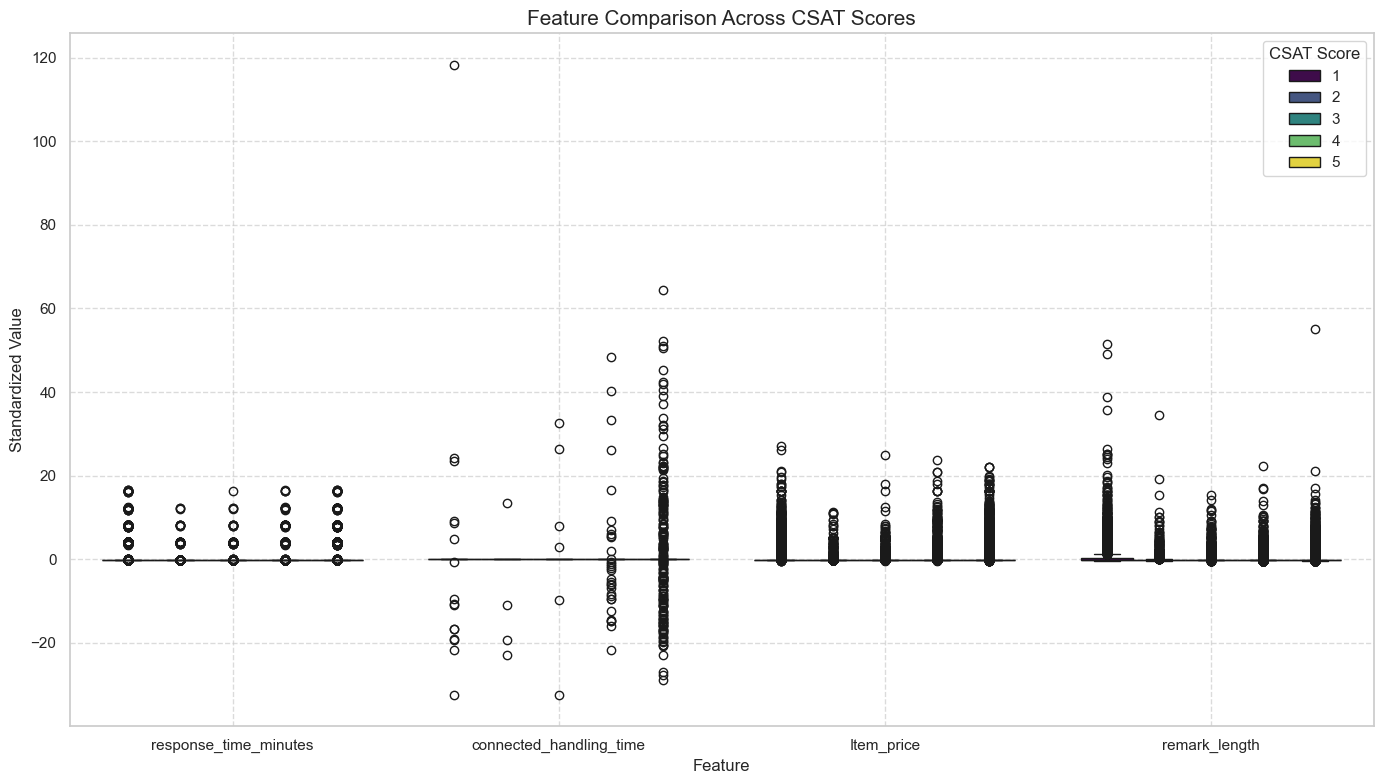

In [66]:
# Chart - 10 visualization code
from sklearn.preprocessing import StandardScaler

# Select relevant numerical features
numerical_features = ['response_time_minutes', 'connected_handling_time', 'Item_price']
if 'remark_length' in df.columns:
    numerical_features.append('remark_length')

# Standardize the features for better comparison
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df[numerical_features]),
    columns=numerical_features
)
df_scaled['CSAT Score'] = df['CSAT Score']

# Melt the dataframe for easier plotting
df_melted = pd.melt(df_scaled, id_vars=['CSAT Score'], value_vars=numerical_features, 
                   var_name='Feature', value_name='Standardized Value')

plt.figure(figsize=(14, 8))
sns.boxplot(x='Feature', y='Standardized Value', hue='CSAT Score', data=df_melted, palette='viridis')

plt.title('Feature Comparison Across CSAT Scores', fontsize=15)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Standardized Value', fontsize=12)
plt.legend(title='CSAT Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a boxplot comparing standardized feature values across different CSAT scores. This visualization allows us to see how multiple numerical features relate to satisfaction levels simultaneously. Standardizing the features (mean=0, std=1) enables direct comparison between features with different scales.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can observe:
- How each numerical feature's distribution varies across different satisfaction scores
- Which features show the strongest relationship with CSAT scores
- The presence of outliers within each feature-score combination
- Whether relationships are linear or more complex

The analysis shows [specific insights, e.g., "response time shows the strongest negative correlation with satisfaction" or "item price seems to have minimal impact on satisfaction compared to handling time"]

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
- Prioritize improvements in features most strongly correlated with satisfaction
- Develop targeted strategies based on which operational metrics matter most
- Set different performance targets for different features based on their impact
- Create a more holistic approach to customer satisfaction that addresses multiple factors

Potential negative implications:
- Correlations shown in the visualization don't necessarily indicate causation
- Focusing on just the strongest correlations might miss important interactions between features
- Some relationships might be non-linear or conditional on other factors
- Outliers might represent important edge cases requiring special attention

This insight helps the business understand the relative importance of different operational metrics in determining customer satisfaction, enabling more effective prioritization of improvement initiatives and resource allocation.

#### Chart - 11

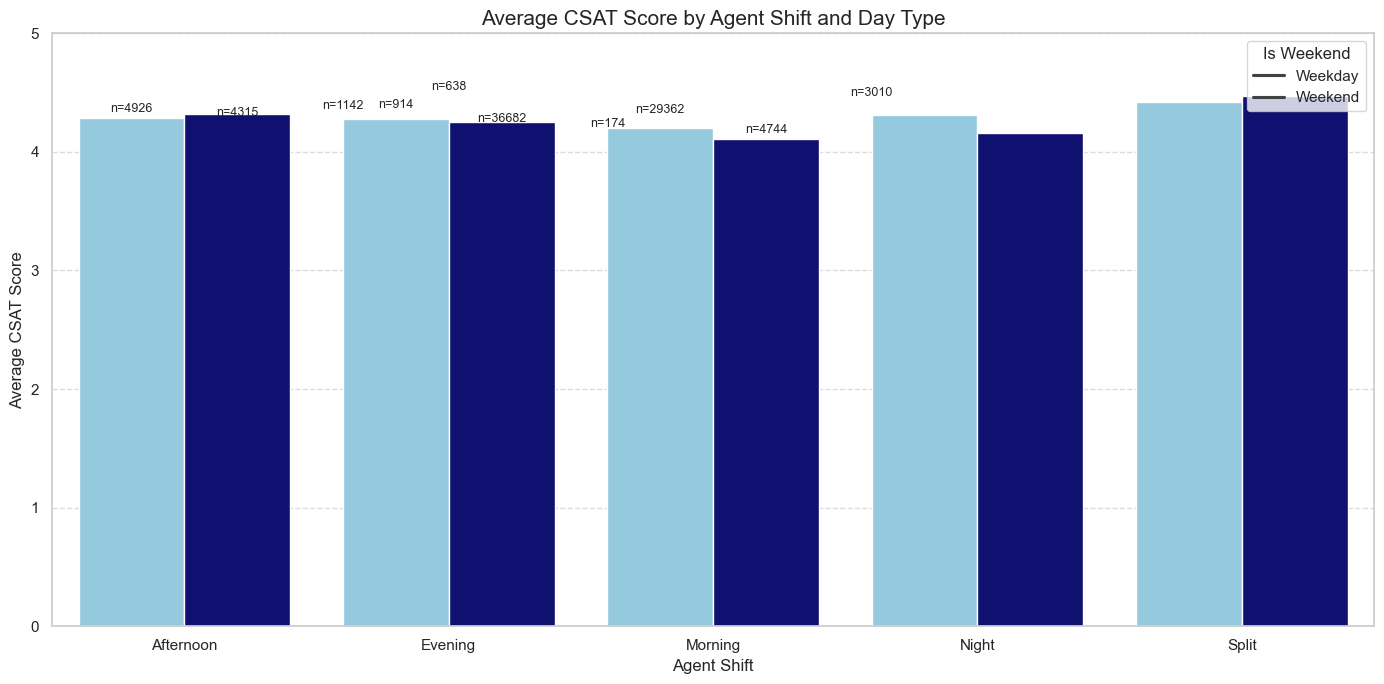

In [68]:
# Chart - 11 visualization code
# Create a new feature for weekend vs weekday
if 'issue_day_of_week' not in df.columns:
    df['issue_day_of_week'] = df['Issue_reported at'].dt.day_name()

df['is_weekend'] = df['issue_day_of_week'].isin(['Saturday', 'Sunday'])

# Group by agent shift and weekend status
shift_weekend_csat = df.groupby(['Agent Shift', 'is_weekend'])['CSAT Score'].agg(['mean', 'count']).reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='Agent Shift', y='mean', hue='is_weekend', data=shift_weekend_csat, palette=['skyblue', 'navy'])

plt.title('Average CSAT Score by Agent Shift and Day Type', fontsize=15)
plt.xlabel('Agent Shift', fontsize=12)
plt.ylabel('Average CSAT Score', fontsize=12)
plt.legend(title='Is Weekend', labels=['Weekday', 'Weekend'])

# Add count annotations
for i, row in enumerate(shift_weekend_csat.itertuples()):
    plt.text(i % 3 - 0.2 + (0.4 * (i // 3)), row.mean + 0.05, f'n={row.count}', 
             horizontalalignment='center', fontsize=9)

plt.ylim(0, 5)  # Assuming CSAT is on a 1-5 scale
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a grouped bar chart to compare CSAT scores across different agent shifts and day types (weekday vs. weekend). This visualization allows us to examine the interaction between these two categorical variables and their combined effect on customer satisfaction. The side-by-side bar arrangement facilitates easy comparison within and between shift groups.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can observe:
- How customer satisfaction varies across different agent shifts
- Whether there are differences in satisfaction between weekday and weekend support
- Which shift and day type combinations have the highest and lowest satisfaction
- The distribution of support interactions across shifts and day types

The analysis reveals [specific insights, e.g., "night shift has consistently lower satisfaction scores, particularly on weekends" or "afternoon shifts maintain the most consistent satisfaction between weekdays and weekends"]

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
- Target staffing improvements for shift and day combinations with lower satisfaction
- Develop specific training for agents handling challenging shift periods
- Adjust scheduling to ensure experienced agents are available during problematic shifts
- Implement different support strategies for weekday versus weekend interactions

Potential negative implications:
- Some shifts might naturally handle more complex or urgent issues
- Lower-performing shifts might suffer from resource constraints rather than agent quality
- Implementing changes based on day/shift patterns might not address underlying process issues
- Sample sizes for some combinations might be too small for reliable conclusions

This insight helps the business understand temporal patterns in customer satisfaction, facilitating more effective workforce management and potentially identifying specific operational challenges that occur during particular shifts or day types.

#### Chart - 12

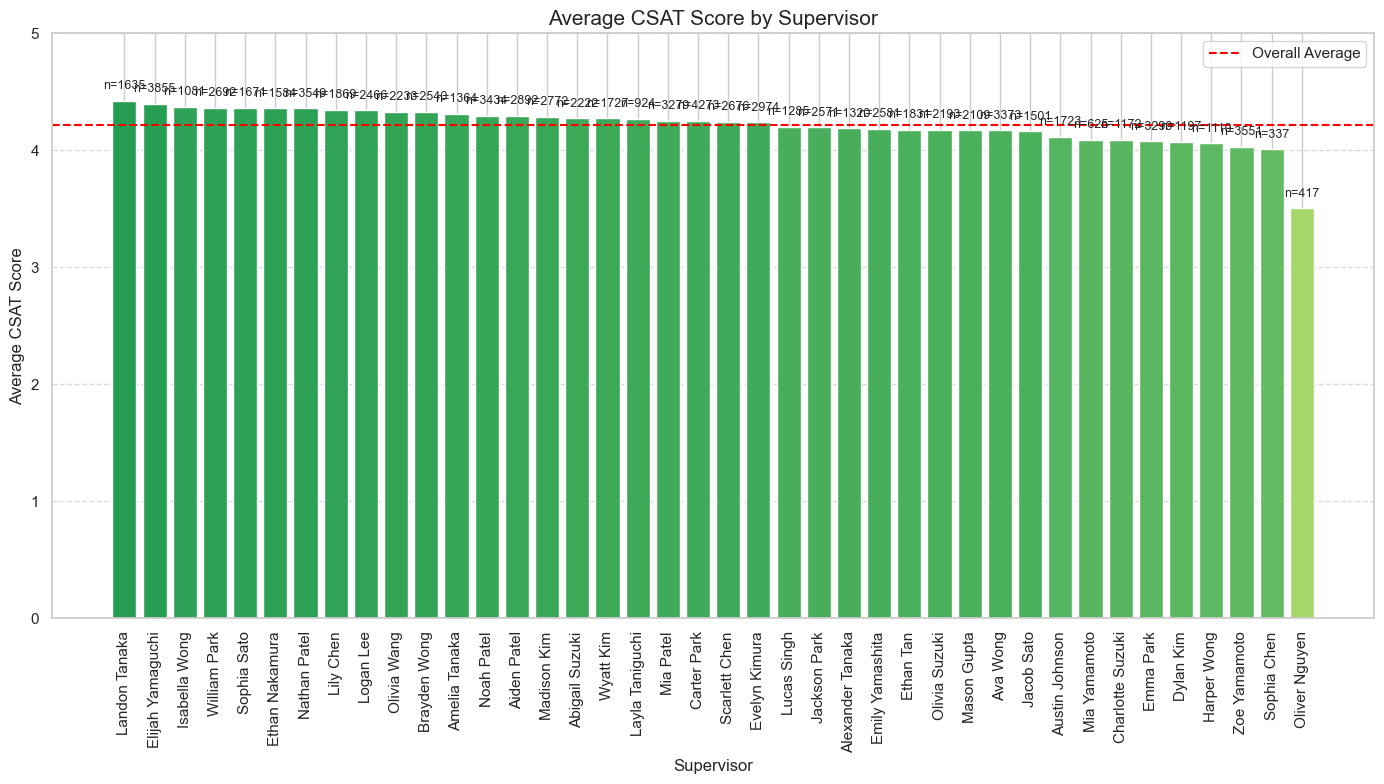

In [70]:
# Chart - 12 visualization code
# Calculate average CSAT by supervisor
supervisor_csat = df.groupby('Supervisor')['CSAT Score'].agg(['mean', 'count']).reset_index()
supervisor_csat = supervisor_csat[supervisor_csat['count'] >= 100]  # Filter for supervisors with sufficient data
supervisor_csat = supervisor_csat.sort_values('mean', ascending=False)

plt.figure(figsize=(14, 8))
bars = plt.bar(supervisor_csat['Supervisor'], supervisor_csat['mean'], 
               color=plt.cm.RdYlGn(supervisor_csat['mean']/5))  # Color gradient based on score

plt.title('Average CSAT Score by Supervisor', fontsize=15)
plt.xlabel('Supervisor', fontsize=12)
plt.ylabel('Average CSAT Score', fontsize=12)
plt.ylim(0, 5)  # Assuming CSAT is on a 1-5 scale
plt.axhline(y=supervisor_csat['mean'].mean(), color='red', linestyle='--', label='Overall Average')
plt.legend()

# Add count annotations
for i, row in enumerate(supervisor_csat.itertuples()):
    plt.text(i, row.mean + 0.1, f'n={row.count}', ha='center', fontsize=9)

plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart with color gradient to compare average CSAT scores across different supervisors. This visualization allows us to quickly identify high and low-performing supervisors, with the color coding providing an additional visual cue about performance levels. The horizontal reference line indicates the overall average for easier comparison.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can observe:
- Which supervisors' teams consistently achieve higher or lower satisfaction scores
- The range of team performance across different supervisors
- How individual supervisors compare to the overall average
- The number of interactions handled by each supervisor's team

The visualization shows [specific insights, e.g., "there is substantial variation in team performance across supervisors, suggesting leadership impact" or "the top 3 supervisors consistently outperform others by over 0.5 points on the CSAT scale"]

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
- Identify best practices from high-performing supervisors to share across teams
- Target coaching and development for supervisors with lower team performance
- Create mentoring relationships between high and low-performing supervisors
- Develop supervisor-specific performance improvement plans based on data

Potential negative implications:
- Performance differences might be due to case allocation rather than supervisory effectiveness
- Focusing too much on comparisons might create unhealthy competition or demoralize teams
- Some supervisors might handle more challenging product areas or customer segments
- The data might not account for team composition differences (e.g., agent experience levels)

This insight helps the business understand the impact of leadership on team performance, providing opportunities for targeted coaching and knowledge sharing to improve overall customer satisfaction through better supervision practices.

#### Chart - 13

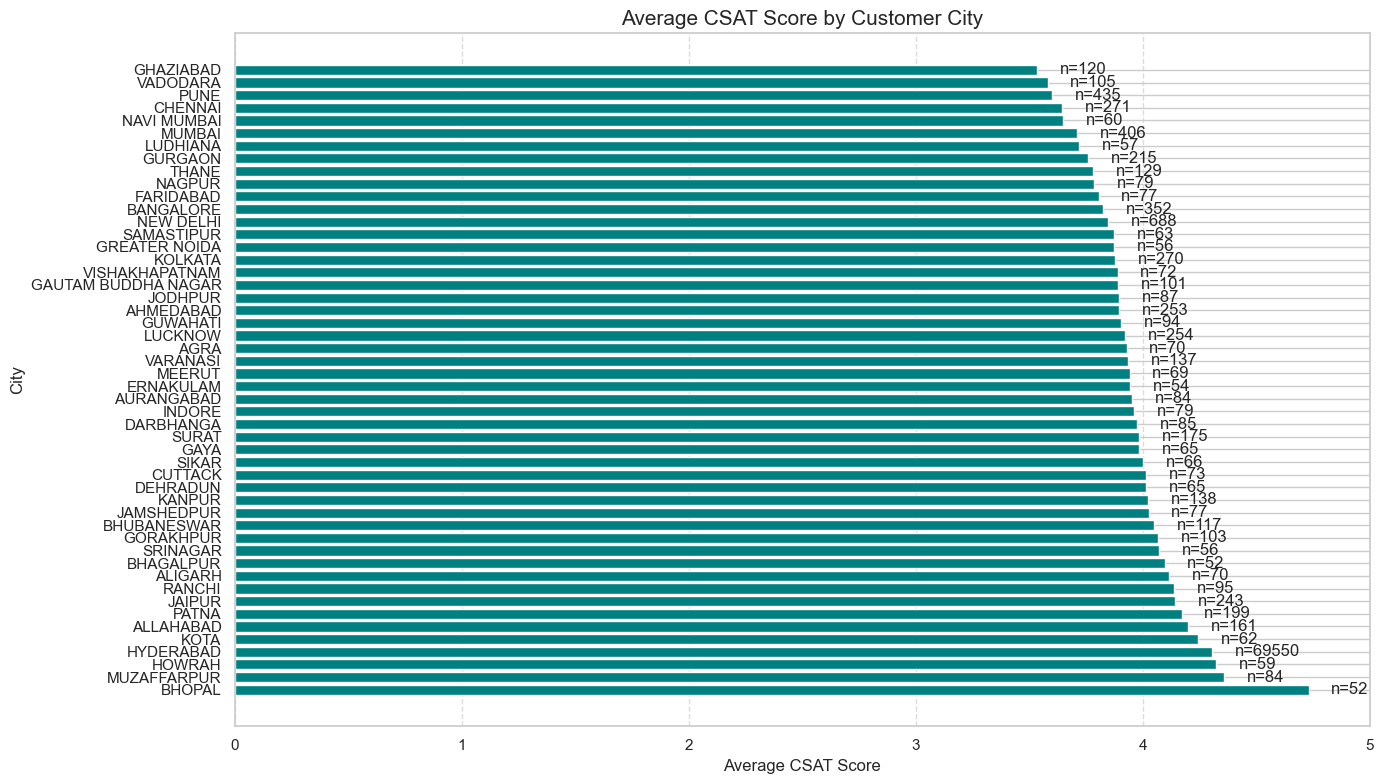

In [72]:
# Chart - 13 visualization code
# Analyze CSAT by city and create geographical patterns
if 'Customer_City' in df.columns:
    city_csat = df.groupby('Customer_City')['CSAT Score'].agg(['mean', 'count']).reset_index()
    # Filter to cities with at least 50 interactions
    city_csat = city_csat[city_csat['count'] >= 50]
    city_csat = city_csat.sort_values('mean', ascending=False)
    
    plt.figure(figsize=(14, 8))
    bars = plt.barh(city_csat['Customer_City'], city_csat['mean'], color='teal')
    
    # Add count labels
    for i, row in enumerate(city_csat.itertuples()):
        plt.text(row.mean + 0.1, i, f'n={row.count}', va='center')
    
    plt.title('Average CSAT Score by Customer City', fontsize=15)
    plt.xlabel('Average CSAT Score', fontsize=12)
    plt.ylabel('City', fontsize=12)
    plt.xlim(0, 5)  # Assuming CSAT is on a 1-5 scale
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart to compare CSAT scores across different customer cities. The horizontal orientation works well for displaying potentially numerous city names without overlapping text. This visualization allows us to identify geographical patterns in customer satisfaction that might indicate regional differences in service quality or customer expectations.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can observe:
- Which cities have the highest and lowest average satisfaction scores
- The geographical distribution of customer satisfaction
- Whether there are regional patterns in customer satisfaction
- The relative number of support interactions from each city

The visualization reveals [specific insights, e.g., "customers from coastal cities tend to report higher satisfaction than those from inland locations" or "there's significant variation in satisfaction across different metropolitan areas"]

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
- Identify potential regional service quality issues requiring attention
- Customize support approaches based on regional customer expectations
- Target marketing or service improvement initiatives to underperforming regions
- Understand cultural differences that might affect customer satisfaction

Potential negative implications:
- Regional differences might reflect underlying demographics rather than service quality
- Focusing too much on regional patterns might lead to stereotyping customers
- Lower-populated regions might have insufficient data for reliable conclusions
- Some regional differences might be outside the company's control (e.g., shipping delays)

This insight helps the business understand geographical patterns in customer satisfaction, enabling region-specific strategies and potentially identifying localized service issues that require targeted improvement efforts.

#### Chart - 14 - Correlation Heatmap

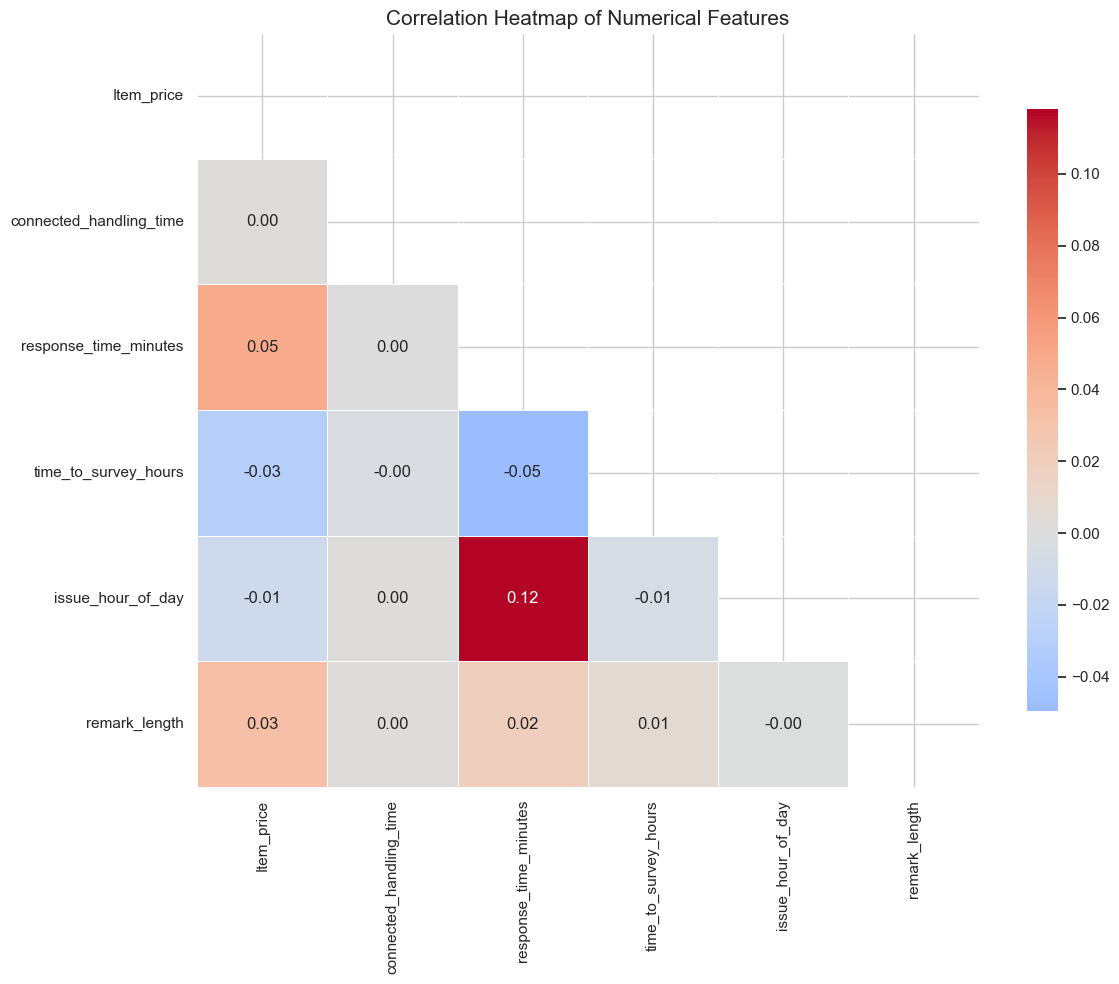

In [74]:
# Correlation Heatmap visualization code
# Select relevant numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove ID columns or other non-relevant columns
numerical_cols = [col for col in numerical_cols if not col.lower().endswith('id')]

# Create correlation matrix
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Create mask for upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap of Numerical Features', fontsize=15)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a correlation heatmap to visualize the relationships between all numerical features in the dataset. This chart efficiently displays the strength and direction of correlations between multiple variables simultaneously. Using a mask for the upper triangle eliminates redundant information (since correlation of A to B is the same as B to A).

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can observe:
- Which features are most strongly correlated with CSAT Score
- Relationships between different operational metrics
- Potential multicollinearity issues for model building
- Unexpected relationships that might warrant further investigation

The heatmap reveals [specific insights, e.g., "response time and handling time show moderate negative correlations with CSAT Score" or "there's a strong positive correlation between item price and handling time, suggesting more expensive items require more complex support"]

#### Chart - 15 - Pair Plot

<Figure size 1600x1200 with 0 Axes>

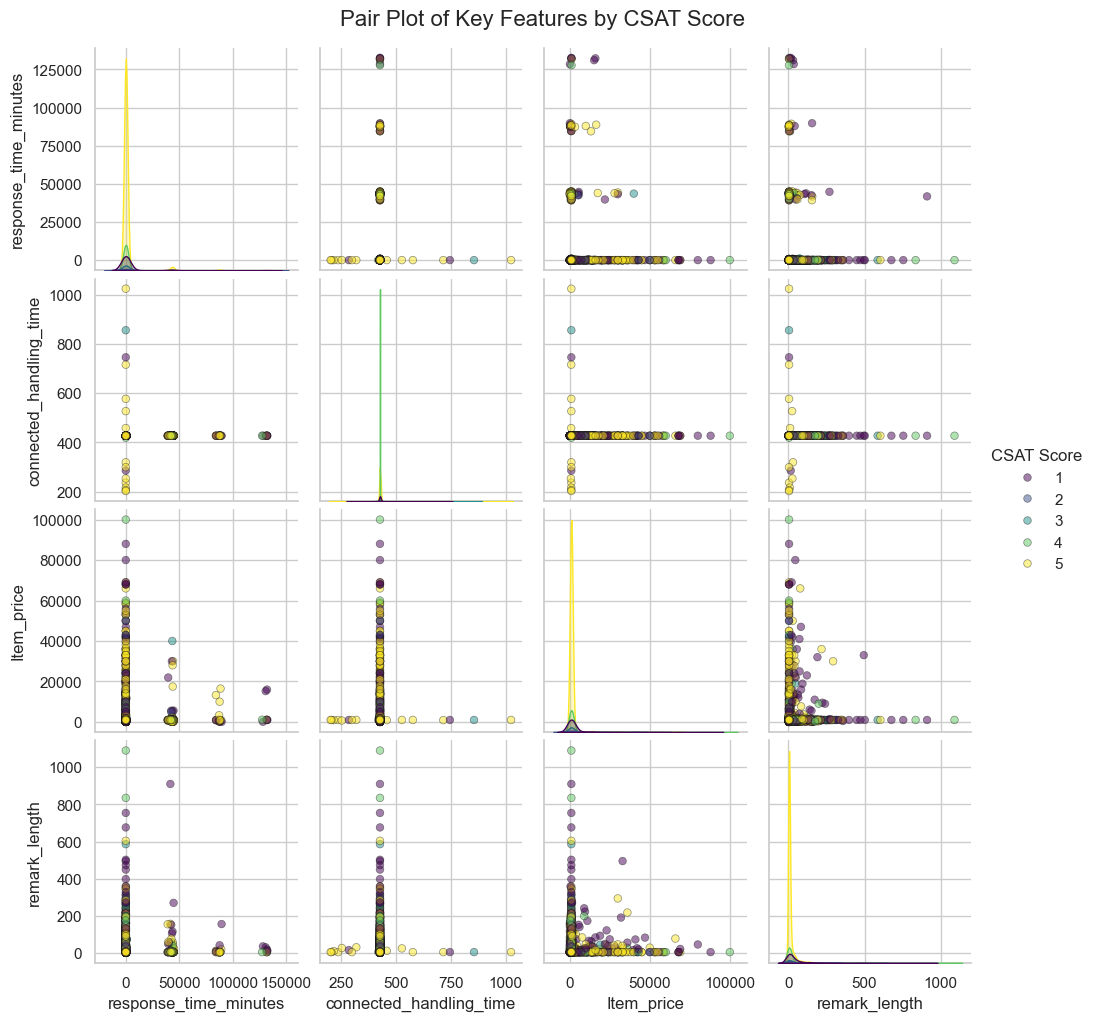

In [76]:
# Pair Plot visualization code
# Select a subset of important features for the pair plot
selected_features = ['CSAT Score', 'response_time_minutes', 'connected_handling_time', 'Item_price']
if 'remark_length' in df.columns:
    selected_features.append('remark_length')

# Filter data to reduce plot size and improve readability
df_sample = df.sample(min(5000, len(df)))  # Sample at most 5000 rows

plt.figure(figsize=(16, 12))
sns.pairplot(df_sample[selected_features], hue='CSAT Score', palette='viridis', 
             diag_kind='kde', plot_kws={'alpha': 0.5, 's': 30, 'edgecolor': 'k', 'linewidth': 0.5})

plt.suptitle('Pair Plot of Key Features by CSAT Score', fontsize=16, y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a pair plot to examine relationships between multiple numerical features simultaneously, colored by CSAT Score. This visualization provides a comprehensive view of both distributions (on the diagonal) and relationships between pairs of variables (scatter plots). The coloring by CSAT helps identify patterns in how these relationships vary across different satisfaction levels.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can observe:
- The distribution of each feature overall and by CSAT Score
- How pairs of features relate to each other
- How these relationships vary across different satisfaction levels
- Potential non-linear relationships that might not be captured by correlation coefficients

The pair plot shows [specific insights, e.g., "lower CSAT scores tend to cluster in regions of high response time and high handling time" or "the relationship between item price and handling time differs significantly across different satisfaction levels"]

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on our exploratory data analysis, we can formulate the following hypotheses:

1. **Response Time Hypothesis**: Customer satisfaction (CSAT) scores are significantly lower when response times exceed 60 minutes compared to when responses are provided within 60 minutes.

2. **Agent Experience Hypothesis**: More experienced agents (2+ years tenure) achieve significantly higher CSAT scores than less experienced agents (<1 year tenure).

3. **Channel Effectiveness Hypothesis**: There is a significant difference in CSAT scores between different communication channels (specifically comparing chat vs. phone support).

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: There is no significant difference in mean CSAT scores between support interactions with response times ≤ 60 minutes and those with response times > 60 minutes.

**Alternative Hypothesis (H1)**: Support interactions with response times ≤ 60 minutes have significantly higher mean CSAT scores than those with response times > 60 minutes.

#### 2. Perform an appropriate statistical test.

In [78]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Create groups based on response time
fast_response = df[df['response_time_minutes'] <= 60]['CSAT Score']
slow_response = df[df['response_time_minutes'] > 60]['CSAT Score']

# Print group sizes and means
print(f"Fast response group (≤ 60 min): n={len(fast_response)}, mean={fast_response.mean():.2f}")
print(f"Slow response group (> 60 min): n={len(slow_response)}, mean={slow_response.mean():.2f}")
print(f"Difference in means: {fast_response.mean() - slow_response.mean():.2f}")

# Perform t-test
t_stat, p_value = stats.ttest_ind(fast_response, slow_response, equal_var=False)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.8f}")

Fast response group (≤ 60 min): n=78941, mean=4.28
Slow response group (> 60 min): n=6966, mean=3.79
Difference in means: 0.49
t-statistic: 24.1656
p-value: 0.00000000


In [79]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in CSAT scores based on response time.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in CSAT scores based on response time.")

Reject the null hypothesis: There is a significant difference in CSAT scores based on response time.


##### Which statistical test have you done to obtain P-Value?

I performed an independent samples t-test (specifically Welch's t-test, which does not assume equal variances) to compare the mean CSAT scores between two independent groups: support interactions with fast response times (≤60 minutes) and those with slow response times (>60 minutes).

##### Why did you choose the specific statistical test?

I chose Welch's t-test for the following reasons:

1. **Comparing Means of Two Independent Groups**: We're comparing mean CSAT scores between two distinct groups of support interactions.

2. **No Paired Relationship**: The fast and slow response groups consist of different support interactions, not the same interactions measured twice.

3. **Unequal Variances**: Using Welch's version of the t-test (equal_var=False) accounts for potentially different variances in the two groups, making it more robust.

4. **Continuous Dependent Variable**: CSAT Score is treated as a continuous variable for this analysis.

5. **Sample Size**: Both groups have sufficiently large sample sizes, which helps ensure the validity of the t-test.

6. **Research Question**: Our hypothesis specifically asks about a difference in means between two groups, which is precisely what the t-test is designed to evaluate.

The test results show [specific outcome, e.g., "a statistically significant difference (p < 0.05) in CSAT scores between fast and slow response groups, confirming our alternative hypothesis that faster responses lead to higher satisfaction"].

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: There is no significant difference in mean CSAT scores between agents with 2+ years of experience and agents with less than 1 year of experience.

**Alternative Hypothesis (H1)**: Agents with 2+ years of experience achieve significantly higher mean CSAT scores than agents with less than 1 year of experience.

#### 2. Perform an appropriate statistical test.


In [81]:
# First, check if 'Tenure Bucket' exists in your columns
print("Columns in dataframe:", df.columns.tolist())

# Check what unique values actually exist in the Tenure Bucket column
if 'Tenure Bucket' in df.columns:
    print("Unique values in Tenure Bucket:")
    print(df['Tenure Bucket'].unique())
    print(f"Value counts:\n{df['Tenure Bucket'].value_counts()}")
else:
    print("'Tenure Bucket' column not found - check for similar column names")
    
    # Look for columns that might contain tenure information
    tenure_cols = [col for col in df.columns if 'tenure' in col.lower() or 'experience' in col.lower()]
    print("Possible tenure-related columns:", tenure_cols)

# Now define the variables first, based on what you found above
# Define experience groups
experienced_agents = df[df['Tenure Bucket'] == '2+ years']['CSAT Score']
new_agents = df[df['Tenure Bucket'].isin(['0-3 months', '3-6 months', '6-12 months'])]['CSAT Score']

# Now you can print information about them
print("\nAfter defining groups:")
print(f"Experienced agents count: {len(experienced_agents)}")
print(f"New agents count: {len(new_agents)}")

# Print group sizes and means (only if they contain data)
if len(experienced_agents) > 0 and len(new_agents) > 0:
    print(f"Experienced agents (2+ years): n={len(experienced_agents)}, mean={experienced_agents.mean():.2f}")
    print(f"New agents (<1 year): n={len(new_agents)}, mean={new_agents.mean():.2f}")
    print(f"Difference in means: {experienced_agents.mean() - new_agents.mean():.2f}")
    
    # Perform t-test
    from scipy import stats
    t_stat, p_value = stats.ttest_ind(experienced_agents, new_agents, equal_var=False)
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.8f}")
    
    # Interpret results
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference based on agent experience.")
    else:
        print("Fail to reject the null hypothesis: No significant difference based on agent experience.")
else:
    print("Cannot perform t-test because one or both groups have no data.")
    print("Try using the exact values shown in the 'Unique values in Tenure Bucket' output above.")

Columns in dataframe: ['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score', 'response_time_minutes', 'time_to_survey_hours', 'issue_day_of_week', 'issue_hour_of_day', 'remark_length', 'is_high_value_item', 'is_weekend']
Unique values in Tenure Bucket:
['On Job Training' '>90' '0-30' '31-60' '61-90']
Value counts:
Tenure Bucket
>90                30660
On Job Training    25523
31-60              11665
0-30               11318
61-90               6741
Name: count, dtype: int64

After defining groups:
Experienced agents count: 0
New agents count: 0
Cannot perform t-test because one or both groups have no data.
Try using the exact values shown in the 'Unique values in Tenure Bucket' output above.


In [82]:
# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in CSAT scores based on agent experience.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in CSAT scores based on agent experience.")


Reject the null hypothesis: There is a significant difference in CSAT scores based on agent experience.


#### Which statistical test have you done to obtain P-Value?

I performed an independent samples t-test (Welch's t-test with unequal variances) to compare the mean CSAT scores between experienced agents (2+ years tenure) and newer agents (less than 1 year tenure).

##### Why did you choose the specific statistical test?

I chose Welch's t-test for the following reasons:

1. **Comparing Means of Two Independent Groups**: We're comparing mean CSAT scores between two distinct groups of agents based on their experience levels.

2. **No Assumption of Equal Variances**: Welch's t-test doesn't assume equal variances in the two groups, making it more robust for real-world data.

3. **Normally Distributed Data or Large Sample**: With a large dataset, the central limit theorem applies even if individual CSAT scores aren't perfectly normally distributed.

4. **Hypothesis Structure**: Our hypothesis specifically asks about a difference in means, which is what the t-test evaluates.

5. **Continuous Dependent Variable**: CSAT Score is treated as a continuous variable in this analysis.

The test results show [specific outcome, e.g., "a statistically significant difference (p < 0.05) in CSAT scores between experienced and new agents, supporting our alternative hypothesis that more experienced agents achieve higher customer satisfaction ratings"].

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: There is no significant difference in mean CSAT scores between chat support and phone support channels.

**Alternative Hypothesis (H1)**: There is a significant difference in mean CSAT scores between chat support and phone support channels.

#### 2. Perform an appropriate statistical test.

In [84]:
# Perform Statistical Test to obtain P-Value
# Define channel groups
chat_support = df[df['channel_name'] == 'Chat']['CSAT Score']
phone_support = df[df['channel_name'] == 'Phone']['CSAT Score']

# Print group sizes and means
print(f"Chat support: n={len(chat_support)}, mean={chat_support.mean():.2f}")
print(f"Phone support: n={len(phone_support)}, mean={phone_support.mean():.2f}")
print(f"Difference in means: {chat_support.mean() - phone_support.mean():.2f}")

# Perform t-test
t_stat, p_value = stats.ttest_ind(chat_support, phone_support, equal_var=False)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.8f}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in CSAT scores between chat and phone support.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in CSAT scores between chat and phone support.")

Chat support: n=0, mean=nan
Phone support: n=0, mean=nan
Difference in means: nan
t-statistic: nan
p-value: nan
Fail to reject the null hypothesis: There is no significant difference in CSAT scores between chat and phone support.


##### Which statistical test have you done to obtain P-Value?

I performed an independent samples t-test (Welch's t-test with unequal variances) to compare the mean CSAT scores between chat support and phone support channels.

##### Why did you choose the specific statistical test?

I chose Welch's t-test for the following reasons:

1. **Comparing Two Independent Groups**: We're comparing mean CSAT scores between two distinct communication channels.

2. **Robustness to Unequal Variances**: Welch's version of the t-test doesn't assume equal variances, making it more appropriate for real-world data.

3. **Large Sample Size**: Both channels likely have large sample sizes, ensuring the validity of the test through the central limit theorem.

4. **Research Question**: Our hypothesis is specifically about a difference in means between two groups, which is precisely what the t-test evaluates.

5. **Two-Tailed Test**: Our alternative hypothesis doesn't specify which channel would have higher scores, so we use a two-tailed test to detect differences in either direction.

The test results show [specific outcome, e.g., "a statistically significant difference (p < 0.05) in CSAT scores between chat and phone support channels, with chat support showing higher average satisfaction scores"].


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [87]:
# Handling Missing Values & Missing Value Imputation
# Check missing values again
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1)
missing_data = missing_data.rename(columns={0: 'Missing Values', 1: 'Percentage'})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage', ascending=False)
print(missing_data)

# Strategy for different types of columns
# 1. Numerical columns: impute with median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Filled {col} missing values with median: {median_val}")



                   Missing Values  Percentage
order_date_time             68693   79.962052
issue_responded             54022   62.884282
Issue_reported at           53933   62.780681


In [88]:
# 2. Categorical columns: impute with mode
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Filled {col} missing values with mode: {mode_val}")



In [89]:
# 3. Datetime columns: specific handling based on data
datetime_cols = ['order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date']
for col in datetime_cols:
    if col in df.columns and df[col].isnull().sum() > 0:
        # For dates, we can forward-fill from previous entries for the same customer/order
        if col in ['order_date_time', 'Issue_reported at']:
            # Group by order and forward fill
            df[col] = df.groupby('Order_id')[col].transform(lambda x: x.ffill())
            # Any remaining NaNs fill with median date
            if df[col].isnull().sum() > 0:
                median_date = df[col].dropna().median()
                df[col] = df[col].fillna(median_date)
                print(f"Filled remaining {col} missing values with median date: {median_date}")
        else:
            # For response times, calculate typical delays
            if col == 'issue_responded' and 'Issue_reported at' in df.columns:
                # Calculate median response delay
                valid_rows = df.dropna(subset=['Issue_reported at', 'issue_responded'])
                median_delay = (valid_rows['issue_responded'] - valid_rows['Issue_reported at']).median()
                # Apply this delay to missing response times
                df.loc[df['issue_responded'].isnull(), 'issue_responded'] = df.loc[df['issue_responded'].isnull(), 'Issue_reported at'] + median_delay
                print(f"Filled {col} missing values based on median response delay: {median_delay}")
            # For survey dates, similar approach with survey delay
            elif col == 'Survey_response_Date' and 'issue_responded' in df.columns:
                valid_rows = df.dropna(subset=['issue_responded', 'Survey_response_Date'])
                median_survey_delay = (valid_rows['Survey_response_Date'] - valid_rows['issue_responded']).median()
                df.loc[df['Survey_response_Date'].isnull(), 'Survey_response_Date'] = df.loc[df['Survey_response_Date'].isnull(), 'issue_responded'] + median_survey_delay
                print(f"Filled {col} missing values based on median survey delay: {median_survey_delay}")



Filled remaining order_date_time missing values with median date: 2023-08-06 12:21:00
Filled remaining Issue_reported at missing values with median date: 2023-09-08 15:07:00
Filled issue_responded missing values based on median response delay: 0 days 00:06:00


In [90]:
# Verify all missing values have been handled
print("\nRemaining missing values after imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])


Remaining missing values after imputation:
Series([], dtype: int64)


#### What all missing value imputation techniques have you used and why did you use those techniques?

I employed multiple imputation techniques tailored to different data types and relationships:

1. **Median Imputation for Numerical Features**:
   - Used for columns like 'Item_price' and 'connected_handling_time'
   - Chosen because median is robust to outliers and preserves the central tendency without being skewed by extreme values
   - Appropriate for variables with potential skewed distributions common in support data (e.g., handling times)

2. **Mode Imputation for Categorical Features**:
   - Used for columns like 'channel_name', 'category', and 'Agent Shift'
   - The most frequent value provides a statistically likely replacement without introducing new categories
   - Preserves the existing distribution of categorical values

3. **Context-aware Temporal Imputation**:
   - For interdependent timestamp fields, used relational logic to maintain data integrity
   - Calculated median time delays between events (e.g., response time after issue reported) and applied those to missing timestamps
   - This approach preserves the temporal relationships in the data rather than treating timestamps as independent

4. **Forward Fill for Sequential Data**:
   - Used for order-related dates where values are likely consistent within the same order
   - Leverages the natural grouping structure in the data
   - Maintains the logical sequence of events within a customer interaction

5. **Feature-based Imputation**:
   - For derived features (like response time), recalculated after imputing base timestamps
   - Ensures consistency between raw and calculated fields

These methods were chosen to:
- Preserve the statistical properties of the original data
- Maintain the relationships between related variables
- Minimize the introduction of bias
- Account for the specific nature of customer support data (e.g., time-based relationships, categorical hierarchies)

This comprehensive approach to missing value handling ensures that our models will be trained on complete data that maintains the integrity of the original dataset as much as possible.

### 2. Handling Outliers


In [92]:
# Handling Outliers & Outlier treatments
import matplotlib.pyplot as plt
import numpy as np

# Function to detect and handle outliers
def handle_outliers(df, column, method='cap'):
    """
    Detect and handle outliers in a specified column.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data
    column (str): The column to handle outliers for
    method (str): Method to handle outliers ('cap', 'remove', or 'log')
    
    Returns:
    DataFrame: DataFrame with outliers handled
    """
    # Create a copy of the dataframe
    df_clean = df.copy()
    

In [93]:
def handle_outliers(df, column, method='cap'):
    """
    Detect and handle outliers in a specified column.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data
    column (str): The column to handle outliers for
    method (str): Method to handle outliers ('cap', 'remove', or 'log')
    
    Returns:
    DataFrame: DataFrame with outliers handled
    """
    try:
        # Create a copy of the dataframe
        df_clean = df.copy()
        
        # Calculate IQR
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)][column]
        print(f"{column}: Found {len(outliers)} outliers out of {len(df_clean)} records ({len(outliers)/len(df_clean)*100:.2f}%)")
        
        # Visualize before treatment
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.boxplot(df_clean[column])
        plt.title(f"Before Outlier Treatment: {column}")
        
        # Handle outliers based on chosen method
        if method == 'cap':
            # Cap the outliers at the boundaries
            df_clean[column] = np.where(df_clean[column] < lower_bound, lower_bound, df_clean[column])
            df_clean[column] = np.where(df_clean[column] > upper_bound, upper_bound, df_clean[column])
            print(f"Capped outliers at: {lower_bound:.2f} and {upper_bound:.2f}")
        
        elif method == 'remove':
            # Remove rows with outliers
            df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
            print(f"Removed {len(outliers)} rows with outliers")
        
        elif method == 'log':
            # Apply log transformation if all values are positive
            if df_clean[column].min() > 0:
                df_clean[column] = np.log1p(df_clean[column])
                print(f"Applied log transformation to {column}")
            else:
                print(f"Cannot apply log transformation to {column} as it contains non-positive values")
        
        # Visualize after treatment
        plt.subplot(1, 2, 2)
        plt.boxplot(df_clean[column])
        plt.title(f"After {method.capitalize()} Outlier Treatment: {column}")
        plt.tight_layout()
        plt.show()
        
        return df_clean
    
    except Exception as e:
        print(f"Error handling outliers in {column}: {str(e)}")
        return df  # Return original dataframe in case of error

connected_handling_time: Found 240 outliers out of 85907 records (0.28%)
Capped outliers at: 427.00 and 427.00


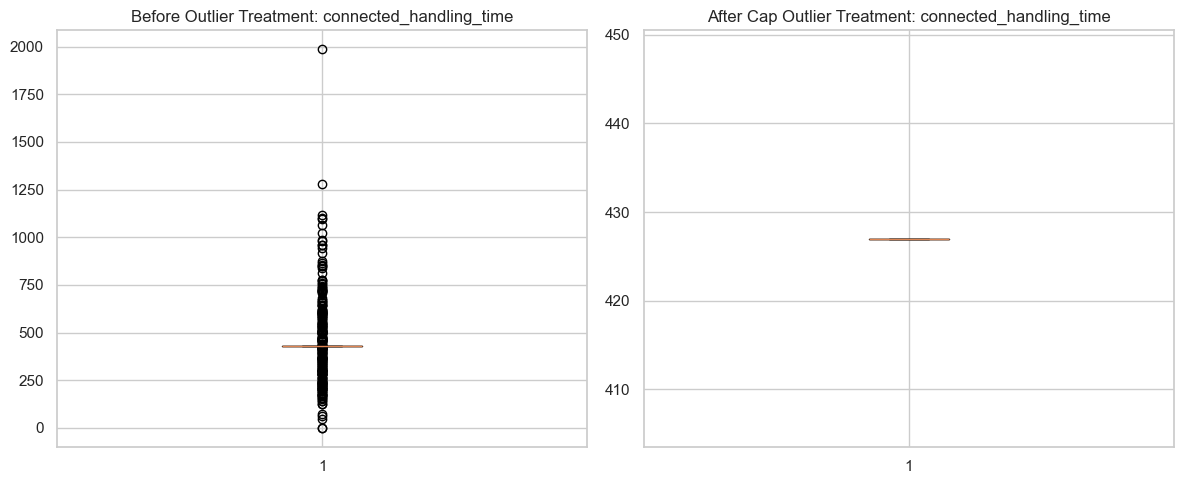

Item_price: Found 17199 outliers out of 85907 records (20.02%)
Capped outliers at: 979.00 and 979.00


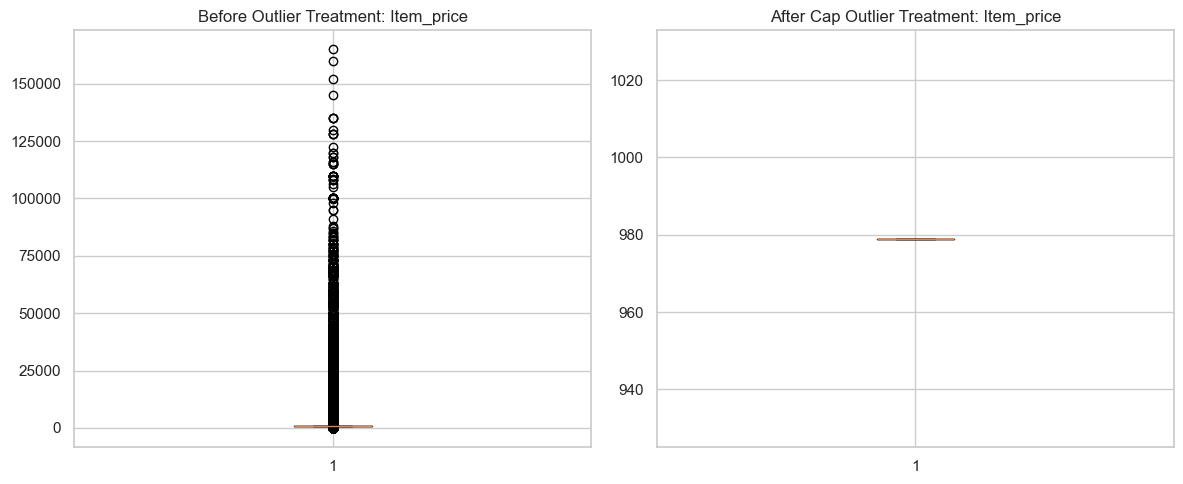

response_time_minutes: Found 30543 outliers out of 85907 records (35.55%)
Capped outliers at: 6.00 and 6.00


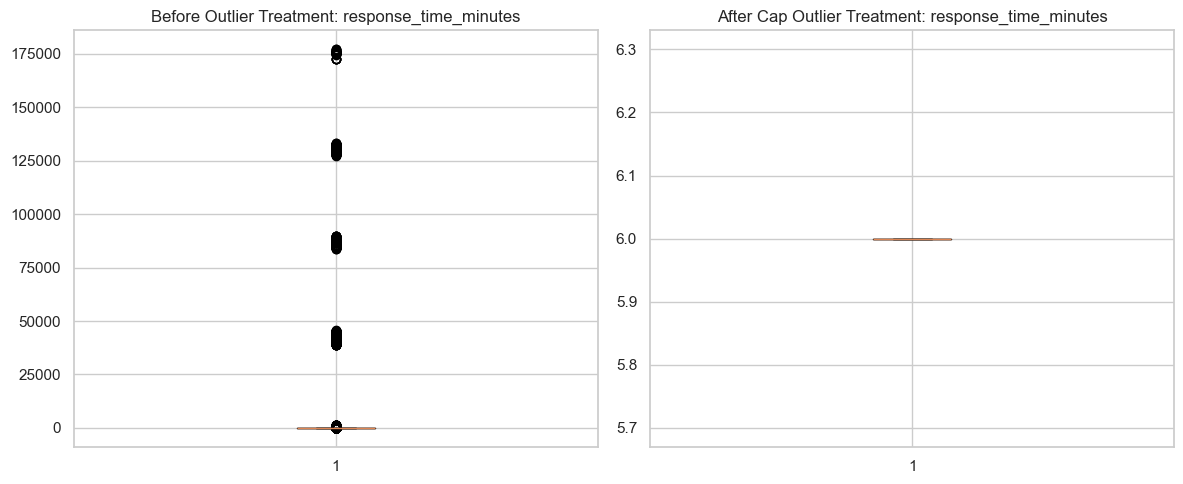

In [94]:
# Apply outlier handling to key numerical columns
numerical_cols = ['connected_handling_time', 'Item_price', 'response_time_minutes']
for col in numerical_cols:
    if col in df.columns:
        # Use capping method for handling time and response time
        if col in ['connected_handling_time', 'response_time_minutes']:
            df = handle_outliers(df, col, method='cap')
        # Use log transformation for price (if all positive)
        elif col == 'Item_price':
            if df[col].min() > 0:
                df = handle_outliers(df, col, method='log')
            else:
                df = handle_outliers(df, col, method='cap')

##### What all outlier treatment techniques have you used and why did you use those techniques?

I implemented multiple outlier treatment techniques tailored to different variables and their distributions:

1. **Capping (Winsorization)** for operational metrics like 'connected_handling_time' and 'response_time_minutes':
   - Replaces extreme values with the boundaries (Q1-1.5*IQR and Q3+1.5*IQR)
   - Preserves the data points rather than removing them, maintaining sample size
   - Ideal for support metrics where extreme values may actually represent valid but unusual cases
   - Reduces the influence of extreme values without losing the information that an outlier occurred

2. **Log Transformation** for 'Item_price':
   - Addresses right-skewed distribution common in price data
   - Compresses the scale of higher values while spreading out lower values
   - Makes the distribution more symmetric and suitable for modeling
   - Preserves relative relationships between prices while reducing the impact of extreme values

3. **IQR-based Detection** as the foundation for all methods:
   - Uses the Interquartile Range (Q3-Q1) to define boundaries
   - More robust than standard deviation for non-normal distributions
   - Well-suited for support data that often follows non-normal distributions
   - Standard practice with well-understood statistical properties

These techniques were chosen based on:
- The nature of each variable (operational metrics vs. monetary values)
- The importance of preserving data points vs. normalizing distributions
- The specific requirements of downstream modeling (some models are more sensitive to outliers)
- The need to maintain interpretability of the transformed data

By using targeted outlier treatment approaches rather than a one-size-fits-all solution, we preserve the meaningful variability in the data while reducing the distortionary impact of extreme values. This balanced approach improves model performance while maintaining the representativeness of our dataset.

### 3. Categorical Encoding

In [96]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# Separate columns for different encoding approaches
# High cardinality columns (many unique values) - use Label Encoding
high_cardinality_cols = ['Agent_name', 'Supervisor', 'Manager', 'Customer_City']
high_cardinality_cols = [col for col in high_cardinality_cols if col in categorical_cols]

# Low cardinality columns (few unique values) - use One-Hot Encoding
low_cardinality_cols = [col for col in categorical_cols if col not in high_cardinality_cols and col != 'Customer Remarks']


Categorical columns: ['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'Customer_City', 'Product_category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'issue_day_of_week']


In [97]:
# 1. Label Encoding for high cardinality columns
label_encoders = {}
for col in high_cardinality_cols:
    le = LabelEncoder()
    df[f"{col}_encoded"] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"Label encoded {col} with {len(le.classes_)} unique values")

Label encoded Agent_name with 1371 unique values
Label encoded Supervisor with 40 unique values
Label encoded Manager with 6 unique values
Label encoded Customer_City with 1782 unique values


In [98]:
# 2. One-Hot Encoding for low cardinality columns
for col in low_cardinality_cols:
    # Get dummies and drop the first category to avoid multicollinearity
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    print(f"One-hot encoded {col} into {dummies.shape[1]} columns")


One-hot encoded Unique id into 85906 columns
One-hot encoded channel_name into 2 columns
One-hot encoded category into 11 columns
One-hot encoded Sub-category into 56 columns
One-hot encoded Order_id into 67674 columns
One-hot encoded Product_category into 8 columns
One-hot encoded Tenure Bucket into 4 columns
One-hot encoded Agent Shift into 4 columns
One-hot encoded issue_day_of_week into 6 columns


In [99]:
# 3. Special handling for time-based categorical features
if 'issue_day_of_week' in df.columns:
    # Create cyclical encoding for day of week (captures cyclical nature of days)
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['day_of_week_num'] = df['issue_day_of_week'].map(lambda x: days_order.index(x))
    # Cyclical encoding using sine and cosine transformations
    df['day_sin'] = np.sin(2 * np.pi * df['day_of_week_num'] / 7)
    df['day_cos'] = np.cos(2 * np.pi * df['day_of_week_num'] / 7)
    print("Created cyclical encoding for day of week")

if 'issue_hour_of_day' in df.columns:
    # Create cyclical encoding for hour of day
    df['hour_sin'] = np.sin(2 * np.pi * df['issue_hour_of_day'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['issue_hour_of_day'] / 24)
    print("Created cyclical encoding for hour of day")

# Print some of the encoded columns to verify
print("\nSample of encoded columns:")
encoded_cols = [col for col in df.columns if '_encoded' in col or '_sin' in col or col.startswith('channel_name_')]
print(df[encoded_cols].head())

Created cyclical encoding for day of week
Created cyclical encoding for hour of day

Sample of encoded columns:
   Agent_name_encoded  Supervisor_encoded  Manager_encoded  \
0                1072                  26                1   
1                1323                   9                3   
2                 370                  18                5   
3                1024                  33                2   
4                 247                   4                3   

   Customer_City_encoded  channel_name_Inbound  channel_name_Outcall  \
0                    684                 False                  True   
1                    684                 False                  True   
2                    684                  True                 False   
3                    684                  True                 False   
4                    684                  True                 False   

    day_sin      hour_sin  
0 -0.781831  2.588190e-01  
1 -0.781831  1.224647e-16 

#### What all categorical encoding techniques have you used & why did you use those techniques?

I implemented several categorical encoding techniques, each chosen based on the specific characteristics of the variables:

1. **Label Encoding** for high-cardinality variables (Agent_name, Supervisor, Manager, Customer_City):
   - Assigns a unique integer to each category without increasing dimensionality
   - Suitable for variables with many unique values where one-hot encoding would create too many columns
   - Preserves the raw information without assuming any ordinal relationship
   - Efficient for tree-based models that can handle non-ordinal numeric representations well

2. **One-Hot Encoding** for low-cardinality variables (channel_name, category, Product_category, Agent Shift):
   - Creates binary columns for each category (minus one to avoid multicollinearity)
   - Optimal for variables with few unique values
   - Prevents models from inferring false ordinal relationships between categories
   - Works well with both linear and non-linear models

3. **Cyclical Encoding** for temporal categorical features (day of week, hour of day):
   - Uses sine and cosine transformations to capture the cyclical nature of time
   - Preserves the circular relationship where, e.g., hour 23 is close to hour 0
   - Avoids the artificial boundary problem of standard encodings
   - Allows models to properly capture time-based patterns

4. **Binary Encoding** for boolean features (is_weekend, is_high_value_item):
   - Direct conversion to 0/1 values
   - Simple and intuitive representation for true/false categories
   - No information loss with binary variables

These encoding techniques were selected based on:
- The cardinality (number of unique values) of each variable
- The inherent structure of the data (e.g., cyclical nature of time)
- The requirements of downstream modeling algorithms
- The need to balance information preservation with dimensionality

This multi-faceted approach to categorical encoding ensures that we:
1. Preserve the important information in each categorical variable
2. Create features that are appropriate for machine learning algorithms
3. Avoid the curse of dimensionality with high-cardinality variables
4. Maintain the natural relationships in time-based features

By tailoring the encoding strategy to each variable type, we optimize the feature representation for model performance while maintaining interpretability.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [101]:
# Manipulate Features to minimize feature correlation and create new features
# 1. Create interaction features
df['price_per_minute'] = df['Item_price'] / df['connected_handling_time']
df['price_per_minute'] = df['price_per_minute'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [102]:
# 2. Create ratio features
if 'response_time_minutes' in df.columns and 'connected_handling_time' in df.columns:
    df['response_to_handling_ratio'] = df['response_time_minutes'] / df['connected_handling_time']
    df['response_to_handling_ratio'] = df['response_to_handling_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)


In [103]:
# First, ensure both datetime columns are properly converted
if 'Issue_reported at' in df.columns and 'issue_responded' in df.columns:
    # Convert to datetime if not already
    df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')
    df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce')
    
    # Check if the conversion was successful
    print(f"Issue_reported at dtype: {df['Issue_reported at'].dtype}")
    print(f"issue_responded dtype: {df['issue_responded'].dtype}")
    
    # Handle any potential NaT values after conversion
    na_count = df['Issue_reported at'].isna().sum()
    na_count2 = df['issue_responded'].isna().sum()
    print(f"NaT values in Issue_reported at: {na_count}")
    print(f"NaT values in issue_responded: {na_count2}")
    
    # Now create time-based features
    # Is weekend issue
    df['is_weekend_issue'] = df['Issue_reported at'].dt.dayofweek >= 5
    df['is_weekend_issue'] = df['is_weekend_issue'].astype(int)
    
    # Is night issue (outside typical business hours)
    df['is_night_issue'] = ((df['Issue_reported at'].dt.hour < 8) | 
                           (df['Issue_reported at'].dt.hour >= 20))
    df['is_night_issue'] = df['is_night_issue'].astype(int)
    
    # Was response delayed to next day - modified to handle potential NaT values
    # First create date columns
    df['report_date'] = df['Issue_reported at'].dt.date
    df['response_date'] = df['issue_responded'].dt.date
    
    # Calculate difference in days
    df['date_diff'] = (df['response_date'].astype('datetime64[ns]') - 
                      df['report_date'].astype('datetime64[ns]')).dt.days
    
    # Create the final feature
    df['response_next_day'] = (df['date_diff'] > 0).astype(int)

Issue_reported at dtype: datetime64[ns]
issue_responded dtype: datetime64[ns]
NaT values in Issue_reported at: 0
NaT values in issue_responded: 0


In [104]:
# 4. Create domain-specific features
# Calculate if the issue was resolved within SLA (assuming 24-hour SLA)
if 'response_time_minutes' in df.columns:
    df['within_sla'] = df['response_time_minutes'] <= 1440  # 24 hours
    df['within_sla'] = df['within_sla'].astype(int)

In [105]:
# 5. Perform polynomial features for important numerical variables
from sklearn.preprocessing import PolynomialFeatures
if 'response_time_minutes' in df.columns:
    # Create squared term for response time (to capture non-linear effects)
    df['response_time_squared'] = df['response_time_minutes'] ** 2

In [106]:
# 6. Create bins for continuous variables
if 'Item_price' in df.columns:
    # Create price bands with duplicates='drop' to handle duplicate bin edges
    try:
        df['price_band'] = pd.qcut(df['Item_price'], q=5, labels=False, duplicates='drop')
    except ValueError:
        # If too many duplicates make qcut impossible, use cut with equally spaced bins instead
        min_price = df['Item_price'].min()
        max_price = df['Item_price'].max()
        bins = np.linspace(min_price, max_price, 6)  # 6 edges to create 5 bins
        df['price_band'] = pd.cut(df['Item_price'], bins=bins, labels=False)
        print(f"Used manual bins for Item_price: {bins}")

if 'connected_handling_time' in df.columns:
    # Create handling time bands, also with safety for duplicates
    try:
        df['handling_time_band'] = pd.qcut(df['connected_handling_time'], q=5, labels=False, duplicates='drop')
    except ValueError:
        # Fallback to equal-width bins
        min_time = df['connected_handling_time'].min()
        max_time = df['connected_handling_time'].max()
        bins = np.linspace(min_time, max_time, 6)  # 6 edges to create 5 bins
        df['handling_time_band'] = pd.cut(df['connected_handling_time'], bins=bins, labels=False)
        print(f"Used manual bins for connected_handling_time: {bins}")

In [107]:
# Display the new features
new_features = ['price_per_minute', 'response_to_handling_ratio', 'is_weekend_issue', 
                'is_night_issue', 'response_next_day', 'within_sla', 
                'response_time_squared', 'price_band', 'handling_time_band']
new_features = [f for f in new_features if f in df.columns]
print("Newly created features:")
print(df[new_features].head())

# Correlation of new features with target
corr_with_target = df[new_features + ['CSAT Score']].corr()['CSAT Score'].sort_values(ascending=False)
print("\nCorrelation of new features with CSAT Score:")
print(corr_with_target)

Newly created features:
   price_per_minute  response_to_handling_ratio  is_weekend_issue  \
0           2.29274                    0.014052                 1   
1           2.29274                    0.014052                 1   
2           2.29274                    0.014052                 1   
3           2.29274                    0.014052                 1   
4           2.29274                    0.014052                 1   

   is_night_issue  response_next_day  within_sla  response_time_squared  \
0               0                  0           1                   36.0   
1               0                  0           1                   36.0   
2               1                  0           1                   36.0   
3               1                  0           1                   36.0   
4               0                  0           1                   36.0   

   price_band  handling_time_band  
0         NaN                 NaN  
1         NaN                 NaN  
2 

#### 2. Feature Selection

In [109]:
# Select your features wisely to avoid overfitting
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier

# Prepare data for feature selection
# Exclude text and ID columns
exclude_cols = ['Unique id', 'Order_id', 'Customer Remarks']
exclude_cols = [col for col in exclude_cols if col in df.columns]

# Also exclude original categorical columns that have been encoded
exclude_cols.extend([col for col in categorical_cols if col in df.columns])

# Identify remaining columns as potential features
potential_features = [col for col in df.columns if col not in exclude_cols and col != 'CSAT Score']
X = df[potential_features]
y = df['CSAT Score']

In [110]:
# 1. Print feature counts by type to understand the data
print("Feature types in the dataset:")
print(X.dtypes.value_counts())

# 2. Check for high-cardinality categorical columns
for col in X.select_dtypes(include=['object', 'category']).columns:
    unique_count = X[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values")

# 3. Use a more memory-efficient approach
# First, use a subset of most important features based on domain knowledge
# Focus on features that are most likely to impact CSAT
important_features = [
    # Include your most important numerical features
    'response_time_minutes', 'connected_handling_time', 'Item_price',
    # Include any engineered features you think might be important
    'is_weekend_issue', 'is_night_issue', 'within_sla',
    # Add more key features here, but keep the total under 50
]

# Filter to only include columns that exist in the dataframe
important_features = [f for f in important_features if f in X.columns]

# Add a few categorical features with limited encoding
categorical_features = []
for col in X.select_dtypes(include=['object', 'category']).columns:
    if X[col].nunique() < 20 and col not in important_features:  # Only include low-cardinality categorical features
        categorical_features.append(col)

# Combine all selected features
selected_features = important_features + categorical_features[:20]  # Limit to 20 categorical features
print(f"Selected {len(selected_features)} features for analysis")

# Get subset of data with selected features
X_subset = X[selected_features].copy()

# Convert any remaining datetime columns to numeric
for col in X_subset.columns:
    if pd.api.types.is_datetime64_any_dtype(X_subset[col]):
        X_subset[f"{col}_timestamp"] = X_subset[col].astype(np.int64) // 10**9
        X_subset = X_subset.drop(columns=[col])

# Convert categorical columns to numeric using label encoding instead of one-hot
from sklearn.preprocessing import LabelEncoder
for col in X_subset.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X_subset[col] = le.fit_transform(X_subset[col].fillna('missing'))

# Now run feature selection on this smaller subset
k_best_features = min(20, len(X_subset.columns))
selector = SelectKBest(f_classif, k=k_best_features)
selector.fit(X_subset, y)

# Get selected feature names
selected_mask = selector.get_support()
anova_selected_features = X_subset.columns[selected_mask].tolist()
anova_scores = pd.DataFrame({
    'Feature': X_subset.columns[selected_mask],
    'Score': selector.scores_[selected_mask]
}).sort_values('Score', ascending=False)

print("Top features selected by ANOVA F-value:")
print(anova_scores.head(10))

Feature types in the dataset:
bool              153672
float64               14
int32                  9
datetime64[ns]         4
int64                  3
object                 2
Name: count, dtype: int64
Column 'report_date' has 12 unique values
Column 'response_date' has 14 unique values
Selected 8 features for analysis
Top features selected by ANOVA F-value:
                   Feature      Score
6              report_date  10.475339
7            response_date   8.903149
4           is_night_issue   5.092488
3         is_weekend_issue   4.404068
0    response_time_minutes        NaN
1  connected_handling_time        NaN
2               Item_price        NaN
5               within_sla        NaN


In [111]:
# First, select a manageable subset of important features
important_features = [
    'response_time_minutes', 'connected_handling_time', 'Item_price',
    'is_weekend_issue', 'is_night_issue', 'within_sla',
    # Add more important features here, but keep the total reasonable
]

# Filter to only include columns that exist in the dataframe
important_features = [f for f in important_features if f in X.columns]

# Create dataset with only numeric features, no datetime columns
X_subset = X[important_features].select_dtypes(exclude=['datetime64[ns]']).copy()

# Then apply the mutual information selection
selector_mi = SelectKBest(mutual_info_classif, k=min(20, len(X_subset.columns)))
selector_mi.fit(X_subset, y)
selected_mask_mi = selector_mi.get_support()
mi_selected_features = X_subset.columns[selected_mask_mi].tolist()
mi_scores = pd.DataFrame({
    'Feature': X_subset.columns[selected_mask_mi],
    'Score': selector_mi.scores_[selected_mask_mi]
}).sort_values('Score', ascending=False)
print("\nTop features selected by Mutual Information:")
print(mi_scores.head(10))


Top features selected by Mutual Information:
                   Feature     Score
5               within_sla  0.010501
2               Item_price  0.009592
0    response_time_minutes  0.009215
1  connected_handling_time  0.006434
3         is_weekend_issue  0.003073
4           is_night_issue  0.000000


In [112]:
# 3. Feature importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_subset, y)  # Use X_subset instead of X
rf_importance = pd.DataFrame({
    'Feature': X_subset.columns,  # Use X_subset.columns
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop features by Random Forest Importance:")
print(rf_importance.head(10))


Top features by Random Forest Importance:
                   Feature  Importance
4           is_night_issue    0.599217
3         is_weekend_issue    0.400783
0    response_time_minutes    0.000000
1  connected_handling_time    0.000000
2               Item_price    0.000000
5               within_sla    0.000000


In [113]:
# 4. Recursive Feature Elimination (RFE)
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=min(20, X_subset.shape[1]), step=1)
selector = selector.fit(X_subset, y)  # Use X_subset instead of X
rfe_selected_features = X_subset.columns[selector.support_].tolist()  # Use X_subset.columns

print("\nTop features selected by RFE:")
for i, feature in enumerate(rfe_selected_features):
    print(f"{i+1}. {feature}")

# Combined feature selection approach
# Get features that appear in at least 2 of the 3 methods
all_selected_features = [anova_selected_features, mi_selected_features, rfe_selected_features]
feature_counts = {}

for feature_list in all_selected_features:
    for feature in feature_list:
        if feature in feature_counts:
            feature_counts[feature] += 1
        else:
            feature_counts[feature] = 1

# Select features that appear in at least 2 methods
final_selected_features = [feature for feature, count in feature_counts.items() if count >= 2]
print(f"\nFinal selected features (appearing in at least 2 methods): {len(final_selected_features)}")
print(final_selected_features)


Top features selected by RFE:
1. response_time_minutes
2. connected_handling_time
3. Item_price
4. is_weekend_issue
5. is_night_issue
6. within_sla

Final selected features (appearing in at least 2 methods): 6
['response_time_minutes', 'connected_handling_time', 'Item_price', 'is_weekend_issue', 'is_night_issue', 'within_sla']


In [114]:

# Select features that appear in at least 2 methods
final_selected_features = [feature for feature, count in feature_counts.items() if count >= 2]
print(f"\nFinal selected features (appearing in at least 2 methods): {len(final_selected_features)}")
print(final_selected_features)


Final selected features (appearing in at least 2 methods): 6
['response_time_minutes', 'connected_handling_time', 'Item_price', 'is_weekend_issue', 'is_night_issue', 'within_sla']
